# **<h3 align="center">Machine Learning 2024-25</h3>**
## **<h3 align="center">To Grant or Not to Grant: Deciding on Compensation Benefits</h3>**


**Group 38 members:**<br>
Ana Marta Azinheira  - 20240496@novaims.unl.pt<br>
Braulio Damba - 20240007@novaims.unl.pt<br>
Henry Tirla  - 20221016@novaims.unl.pt<br>
Marco Galão  - r20201545@novaims.unl.pt<br>
Rodrigo Sardinha - 20211627@novaims.unl.pt<br>

<a id = "toc"></a>

# Table of Contents

* [1. Import the Libraries](#import_libraries)
* [2. Import the Dataset](#import_dataset)
* [3. Description of the Dataset’s Structure](#dataset_structure)
* [4. Exploring the Dataset](#exploration)
    * [4.1. Constant Features](#constant_features)
    * [4.2. Duplicates](#duplicates)
    * [4.3. Missing Values](#missing_values)
    * [4.4. Data Types](#data_types)
    * [4.5. Coherence Checking](#coherence_checking)
        * [4.5.1. X](#x)
    * [4.6. Visualizations](#visualizations)
    * [4.7. Correlation Matrix](#correlation_matrix)
    * [4.8. Outliers](#outliers)
* [5. Feature Engineering](#feature_engineering)
    * [5.1. X](#x)



# 1. Import the Libraries <a class="anchor" id="import_the_libraries"></a>


In [216]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import bokeh as bk
import sqlite3
import os
from math import ceil

import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'

sns.set()

#Date
from datetime import datetime
from dateutil import relativedelta

# 2. Import the DataSet <a class="anchor" id="import_the_dataset"></a>

In [218]:
df_train = pd.read_csv('../data/train_data.csv', sep=',')

In [219]:
#importing the test dataset
df_test = pd.read_csv('../data/test_data.csv', sep=',')

In [220]:
df_train[["Agreement Reached", "WCB Decision", "Claim Injury Type"]].head()

,Agreement Reached,WCB Decision,Claim Injury Type
0,0.0,Not Work Related,2. NON-COMP
1,1.0,Not Work Related,4. TEMPORARY
2,0.0,Not Work Related,4. TEMPORARY
3,NaN,NaN,NaN
4,0.0,Not Work Related,2. NON-COMP


In [224]:
# Check if specific columns are in df_test and store results in a dictionary
column_check = {col: col in df_test.columns for col in ["Agreement Reached", "WCB Decision", "Claim Injury Type"]}

print(column_check)

{'Agreement Reached': False, 'WCB Decision': False, 'Claim Injury Type': False}


# 3. Description of the Dataset’s Structure <a class="anchor" id="dataset_structure"></a>

- *Accident Date* - Injury date of the claim.

- *Age at Injury* - Age of injured worker when the injury occurred.
    
- *Alternative Dispute Resolution* - Adjudication processes external to the Board.

- *Assembly Date* - The date the claim was first assembled.
    
- *Attorney/Representative* - Is the claim being represented by an Attorney?

- *Average Weekly Wage* - The wage used to calculate workers’ compensation, disability, or an Paid Leave wage replacement benefits.

- *Birth Year* - The reported year of birth of the injured worker.
    
- *C-2 Date* - Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).
    
- *C-3 Date* - Date Form C-3 (Employee Claim Form) was received.
    
- *Carrier Name* - Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.
    
- *Carrier Type* - Type of primary insurance provider responsible for providing workers’ compensation coverage.

- *Claim Identifier* - Unique identifier for each claim, assigned by WCB.

- *County of Injury* - Name of the New York County where the injury occurred.

- *COVID-19 Indicator* - Indication that the claim may be associated with COVID-19.

- *District Name* - Name of the WCB district office that oversees claims for that region or area of the state.

- *First Hearing Date* - Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.

- *Gender* - The reported gender of the injured worker.

- *IME-4 Count* - Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.

- *Industry Code* - NAICS code and descriptions are available at: https://www.naics.com/search-naics-codes-by-industry/.

- *Industry Code Description* - 2-digit NAICS industry code description used to classify businesses according to their economic activity.

- *Medical Fee Region* - Approximate region where the injured worker would receive medical service.

- *OIICS Nature of Injury Description* - The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.

- *WCIO Cause of Injury Code* - The WCIO cause of injury codes & descriptions are at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf

- *WCIO Cause of Injury Description* - See description of field above.

- *WCIO Nature of Injury Code* - The WCIO nature of injury are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf

- *WCIO Nature of Injury Description* - See description of field above.

- *WCIO Part Of Body Code* - The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf

- *WCIO Part Of Body Description* - See description of field above.

- *Zip Code* - The reported ZIP code of the injured worker’s home address.

- *Agreement Reached* - Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim.

- *WCB Decision* - Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim.

- *Claim Injury Type* - Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.

# 4. Exploring the DataSet <a class="anchor" id="exploration"></a>

In [226]:
df_train.shape

(593471, 33)

In [228]:
df_train.head().T

,0,1,2,3,4
Accident Date,2019-12-30,2019-08-30,2019-12-06,NaN,2019-12-30
Age at Injury,31.0,46.0,40.0,NaN,61.0
Alternative Dispute Resolution,N,N,N,NaN,N
Assembly Date,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01
Attorney/Representative,N,Y,N,NaN,N
Average Weekly Wage,0.0,1745.93,1434.8,NaN,NaN
Birth Year,1988.0,1973.0,1979.0,NaN,1958.0
C-2 Date,2019-12-31,2020-01-01,2020-01-01,NaN,2019-12-31
C-3 Date,NaN,2020-01-14,NaN,NaN,NaN
Carrier Name,NEW HAMPSHIRE INSURANCE CO,ZURICH AMERICAN INSURANCE CO,INDEMNITY INSURANCE CO OF,NaN,STATE INSURANCE FUND


In [230]:
df_train.tail().T

,593466,593467,593468,593469,593470
Accident Date,NaN,2022-12-13,NaN,NaN,NaN
Age at Injury,NaN,72.0,NaN,NaN,NaN
Alternative Dispute Resolution,NaN,N,NaN,NaN,NaN
Assembly Date,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31
Attorney/Representative,NaN,N,NaN,NaN,NaN
Average Weekly Wage,NaN,0.0,NaN,NaN,NaN
Birth Year,NaN,1950.0,NaN,NaN,NaN
C-2 Date,NaN,2022-12-31,NaN,NaN,NaN
C-3 Date,NaN,NaN,NaN,NaN,NaN
Carrier Name,NaN,TECHNOLOGY INSURANCE CO. INC.,NaN,NaN,NaN


In [232]:
#checking the data types of the variables of the training dataset and if there are any missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

- From this information, we can see that the variables 'Assembly Date' and 'Claim Identifier' have no missing values.

In [234]:
#getting the main descriptive statistics only for the numerical variables

df_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.11,1.426000e+01,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.09,6.092920e+03,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.77,4.146400e+02,0.0,1965.0,1977.0,1989.0,2018.0
Claim Identifier,593471.0,23667598.79,1.079271e+08,5393066.0,5593414.5,5791212.0,5991000.5,999891667.0
IME-4 Count,132803.0,3.21,2.830000e+00,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.65,1.964000e+01,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.38,2.587000e+01,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.01,2.221000e+01,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.74,2.237000e+01,-9.0,33.0,38.0,53.0,99.0


<br>

- 'Claim Identifier': set it as the df index (and check for duplicates)

- convert to integer:
    - 'Age at Injury': also explore min and max & check consistency with 'Birth Year'
    - 'Birth Year': also explore zeros & treat outliers (born in 2018)
    - 'IME-4 Count': also treat outlier
    - 'Industry Code': also check consistency with the link
    - 'Number of Dependents': not in metadata (make assumption) & seems uniformly distributed (strange - similar number of workers with 4, 5 or 6 dependents and workers with 0 or 1 dependents)

- special missing values:
    - 'OIICS Nature of Injury Description': full of missing values (drop this column)

- 'Average Weekly Wage': explore wage of 0 & treat outliers
- 'WCIO Cause of Injury Code': explore codes meaning (link doesn't work) & check consistency with 'WCIO Cause of Injury Description'
- 'WCIO Part Of Body Code': explore codes meaning (link doesn't work) & treat outliers (can accept negative codes?) & check consistency with 'WCIO Part Of Body Description'
- 'Agreement Reached': seems okay (missing value at the start of the claim)


In [236]:
# getting the main descriptive statistics for the remaining cathegorical variables

df_train.describe(include = ['object']).T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


<br>

- convert to datetime (check if dates are from the start of 2020 till the end of 2022):
    - 'Accident Date'
    - 'Assembly Date'
    - 'C-2 Date'
    - 'C-3 Date'
    - 'First Hearing Date' (missing values: a blank date means the claim has not yet had a hearing held)

- convert to binary:
    - 'Alternative Dispute Resolution': maybe the 'U's represent missing values (we can make this assumption)
    - 'Attorney/Representative'
    - 'COVID-19 Indicator'

- special missing values:
    - 'Carrier Type': replace 'UNKNOWN' (maybe also '5D. SPECIAL FUND - UNKNOWN') & explore online (for example, do the code represents a category)
    - 'Gender': explore values 'U' and 'X' (maybe 'U' means Unknown or Unspecified, and 'X' refers to Non-Binary, Gender X, or Other gender identities) - make assumptions
    - 'Medical Fee Region': explore values & 'UK' maybe stands for Unknown or Unclassified


- 'Claim Injury Type': seems okay (just need to understand the different values)
- 'Carrier Name': explore (for example, check if the same insurance provider is written differently)
- 'County of Injury': seems okay (just need to explore the different values)
- 'District Name': seems okay (just need to explore if the values correspond to NY districts)
- 'Industry Code Description': seems okay (just need to check consistency with the link of 'Industry Code')
- 'WCIO Cause of Injury Description': seems okay (just need to explore values & check consistency with 'WCIO Cause of Injury Code')
- 'WCIO Part Of Body Description': seems okay (just need to explore values & check consistency with 'WCIO Part Of Body Code')
- 'Zip Code': seems okay (just need to explore values)
- 'WCB Decision': just 'Not Work Related', which is not stated in the metadata (missing value at the start of the claim, because requires WCB deliberation)

# 4.0. Set Index <a id="set_index"></a>

Let's check if 'Claim Identifier' is appropriate for index

In [238]:
# Ensure all values in 'Claim Identifier' are converted to strings for length calculation
claim_lengths = df_train["Claim Identifier"].astype(str).apply(len)

# Count occurrences of each unique length
length_counts = claim_lengths.value_counts(normalize=True) * 100

# Display the results
print("Number of values by length in 'Claim Identifier':")
print(length_counts.round(2))

Number of values by length in 'Claim Identifier':
Claim Identifier
7    96.72
9     3.28
Name: proportion, dtype: float64


In [240]:
# Filter rows by length of 'Claim Identifier' (7 or 9 characters)
claim_id_7_length = df_train[df_train['Claim Identifier'].astype(str).apply(len) == 7]
claim_id_9_length = df_train[df_train['Claim Identifier'].astype(str).apply(len) == 9]

In [242]:
claim_id_7_length.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,4.211427e+01,14.256432,0.0,31.00,42.0,54.00,117.0
Average Weekly Wage,545375.0,4.910883e+02,6092.918120,0.0,0.00,0.0,841.00,2828079.0
Birth Year,544948.0,1.886768e+03,414.644423,0.0,1965.00,1977.0,1989.00,2018.0
Claim Identifier,574026.0,5.778956e+06,222308.226013,5393066.0,5586764.25,5778282.5,5971328.75,6165685.0
IME-4 Count,132803.0,3.207337e+00,2.832303,1.0,1.00,2.0,4.00,73.0
Industry Code,564068.0,5.864531e+01,19.644175,11.0,45.00,61.0,71.00,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,5.438114e+01,25.874281,1.0,31.00,56.0,75.00,99.0
WCIO Nature of Injury Code,558369.0,4.101384e+01,22.207521,1.0,16.00,49.0,52.00,91.0
WCIO Part Of Body Code,556944.0,3.973815e+01,22.365940,-9.0,33.00,38.0,53.00,99.0


In [244]:
claim_id_7_length.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,574026,897,2020-03-06,1413
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [246]:
claim_id_9_length.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alternative Dispute Resolution,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,19445,1096,2020-06-16,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birth Year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-2 Date,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Decision:** The records with a 9-length Claim Identifier account for just 3.28% of the data and have missing values across all columns, except for “Assembly Date”. Since they provide very little information, we’ve decided to drop them to maintain data quality (with all records now having a 7-length Claim Identifier) and improve model performance

In [248]:
df_train_no_claim_id_9_length = df_train[df_train['Claim Identifier'].astype(str).apply(len) != 9]

Let's check if "Claim Identifier" has missing values

In [250]:
df_train_no_claim_id_9_length["Claim Identifier"].isna().sum()

0

**Conclusion:** No missing values

Let's check if "Claim Identifier" has duplicates

In [252]:
df_train_no_claim_id_9_length["Claim Identifier"].duplicated().sum()

0

**Conclusion:** No duplicates

In [254]:
df_train_index = df_train_no_claim_id_9_length.set_index("Claim Identifier")
df_train_index.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0


# 4.1. Constant Features <a id="constant_feature"></a>

In [67]:
variances = df_train_index.var(numeric_only=True)
variances[variances == 0]

Series([], dtype: float64)

**Conclusion**: There are no univariate features

# 4.2. Duplicates

In [256]:
# Check for duplicated observations
df_train_index.duplicated().sum()

1

**Conclusion:** There is 1 duplicated observation. Let's drop it

In [258]:
# Drop all duplicates
df_train_no_duplicates = df_train_index.drop_duplicates(keep='first')

# 4.3. Missing Values

- columns with just missing values:
  - 'OIICS Nature of Injury Description'
- hidden missing values:
  - 'Carrier Type'
  - 'Gender'
  - 'Medical Fee Region'
  - 'Alternative Dispute Resolution'

In [260]:
df_train_treat_missing = df_train_no_duplicates.copy()

Drop column "OIICS Nature of Injury Description", because it has only missing values

In [262]:
df_train_treat_missing["OIICS Nature of Injury Description"].value_counts(dropna=False, normalize=True) * 100

OIICS Nature of Injury Description
NaN    100.0
Name: proportion, dtype: float64

In [264]:
df_train_treat_missing.drop(columns=["OIICS Nature of Injury Description"], inplace=True)

Check hidden missing values

In [266]:
df_train_treat_missing["Carrier Type"].value_counts(dropna=False, normalize=True) * 100

Carrier Type
1A. PRIVATE                                    49.713340
3A. SELF PUBLIC                                21.239493
2A. SIF                                        19.362223
4A. SELF PRIVATE                                9.196115
UNKNOWN                                         0.309046
5D. SPECIAL FUND - UNKNOWN                      0.178215
5C. SPECIAL FUND - POI CARRIER WCB MENANDS      0.000871
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)     0.000697
Name: proportion, dtype: float64

In [268]:
df_train_treat_missing[df_train_treat_missing["Carrier Type"] == "UNKNOWN"].describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,1774.0,37.949267,17.329159,0.0,28.0,38.0,51.0,79.0
Average Weekly Wage,1682.0,10.470488,103.732252,0.0,0.0,0.0,0.0,2500.0
Birth Year,1681.0,1710.386675,676.139876,0.0,1960.0,1974.0,1987.0,2008.0
IME-4 Count,116.0,2.293103,1.652493,1.0,1.0,2.0,3.0,11.0
Industry Code,625.0,46.411200,18.525940,11.0,23.0,48.0,56.0,92.0
WCIO Cause of Injury Code,387.0,52.299742,26.988350,1.0,28.5,45.0,75.0,99.0
WCIO Nature of Injury Code,366.0,47.117486,27.002483,1.0,20.5,52.0,59.0,90.0
WCIO Part Of Body Code,555.0,23.819820,33.051103,-9.0,-9.0,23.0,46.0,99.0
Agreement Reached,1774.0,0.020293,0.141041,0.0,0.0,0.0,0.0,1.0
Number of Dependents,1774.0,3.016347,1.997817,0.0,1.0,3.0,5.0,6.0


In [270]:
df_train_treat_missing[df_train_treat_missing["Carrier Type"] == "UNKNOWN"].describe(include='object').T

,count,unique,top,freq
Accident Date,1719,941,2001-09-11,56
Alternative Dispute Resolution,1774,1,N,1774
Assembly Date,1774,679,2021-01-04,8
Attorney/Representative,1774,2,Y,1079
C-2 Date,572,375,2022-09-27,7
C-3 Date,1421,696,2020-02-03,8
Carrier Name,1774,1,*** CARRIER UNDETERMINED ***,1774
Carrier Type,1774,1,UNKNOWN,1774
Claim Injury Type,1774,5,2. NON-COMP,1529
County of Injury,1774,57,QUEENS,404


**Decision:** 'UNKNOWN' indicates that the type of the insurance provider was unavailable or not recorded at the time the data was collected, so it should be replaced with np.nan (instead of dropping because they have meaningful information)

In [272]:
df_train_treat_missing["Gender"].value_counts(dropna=False, normalize=True) * 100

Gender
M    58.397631
F    40.773660
U     0.820696
X     0.008014
Name: proportion, dtype: float64

In [274]:
df_train_treat_missing[df_train_treat_missing["Gender"] == "U"].describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,4711.0,39.962428,14.608975,0.0,29.0,38.0,52.0,84.00
Average Weekly Wage,4488.0,264.574615,597.232754,0.0,0.0,0.0,0.0,5309.25
Birth Year,4471.0,1835.771416,514.235587,0.0,1965.0,1980.0,1991.0,2006.00
IME-4 Count,567.0,3.250441,2.921360,1.0,1.0,2.0,4.0,21.00
Industry Code,4656.0,55.841065,14.845878,11.0,48.0,61.0,62.0,92.00
WCIO Cause of Injury Code,4648.0,56.717083,26.655002,1.0,31.0,59.0,81.0,99.00
WCIO Nature of Injury Code,4648.0,45.676850,24.565870,1.0,28.0,52.0,59.0,91.00
WCIO Part Of Body Code,4642.0,44.548255,23.583361,-9.0,35.0,42.0,55.0,99.00
Agreement Reached,4711.0,0.035237,0.184397,0.0,0.0,0.0,0.0,1.00
Number of Dependents,4711.0,3.009128,2.009352,0.0,1.0,3.0,5.0,6.00


In [276]:
df_train_treat_missing[df_train_treat_missing["Gender"] == "U"].describe(include='object').T

,count,unique,top,freq
Accident Date,4710,1248,2022-01-03,18
Alternative Dispute Resolution,4711,2,N,4709
Assembly Date,4711,771,2022-01-07,22
Attorney/Representative,4711,2,N,3940
C-2 Date,4652,879,2022-10-20,21
C-3 Date,754,501,2022-07-15,5
Carrier Name,4711,449,SAFETY NATIONAL CASUALTY CORP,693
Carrier Type,4711,7,1A. PRIVATE,3713
Claim Injury Type,4711,6,2. NON-COMP,3072
County of Injury,4711,63,QUEENS,451


**Decision:**
- Drop X: Since the X category represents a very small percentage (0.008%), it likely won’t provide much value for the predictive model, so it can be safely dropped.
- Convert U to missing: The U category may represent unknown or unspecified gender. Therefore, converting U to missing value seems a reasonable approach

In [278]:
df_train_treat_missing = df_train_treat_missing[df_train_treat_missing['Gender'] != 'X']

In [280]:
df_train_treat_missing["Medical Fee Region"].value_counts(dropna=False, normalize=True) * 100

Medical Fee Region
IV     46.333402
I      23.674211
II     14.814479
III     9.347380
UK      5.830527
Name: proportion, dtype: float64

**Decision:** 'UK' likely refers to 'Unknown'. Therefore, replacing 'UK' with np.nan allows subsequent analyses to focus on the regions that are known (I, II, III, IV) without the influence of ambiguous entries

In [282]:
df_train_treat_missing["Alternative Dispute Resolution"].value_counts(dropna=False, normalize=True) * 100

Alternative Dispute Resolution
N    99.544583
Y     0.454546
U     0.000871
Name: proportion, dtype: float64

**Decision:** Treating 'U' as a missing value (pd.NA) seems a good approach given the binary context of the variable and the low frequency of this value. This will help in maintaining data integrity and ensuring that our analysis is accurate and meaningful

The missing values in the original DataFrame are represented as np.nan. To ensure consistency throughout our dataset, we will standardize the representation of missing values (as np.nan)

In [284]:
df_train_treat_missing["Carrier Type"].replace("UNKNOWN", np.nan, inplace=True)
df_train_treat_missing["Gender"].replace("U", np.nan, inplace=True)
df_train_treat_missing["Medical Fee Region"].replace("UK", np.nan, inplace=True)
df_train_treat_missing["Alternative Dispute Resolution"].replace("U", np.nan, inplace=True)

"As a general rule of thumb, only features that are missing in excess of 60% of their values should be considered for complete removal" (Fundamentals of Machine Learning for Predictive Data Analytics Algorithms).

In [286]:
# Calculate the percentage of missing values in each column
perc_missing_values = (df_train_treat_missing.isna().sum() / len(df_train_treat_missing) * 100).round(2)
perc_missing_values[perc_missing_values > 0].sort_values(ascending=False)

IME-4 Count                          76.87
First Hearing Date                   73.73
C-3 Date                             67.39
Medical Fee Region                    5.83
Birth Year                            5.07
Zip Code                              4.99
Average Weekly Wage                   4.99
WCIO Part Of Body Description         2.98
WCIO Part Of Body Code                2.98
WCIO Nature of Injury Code            2.73
WCIO Nature of Injury Description     2.73
WCIO Cause of Injury Code             2.72
WCIO Cause of Injury Description      2.72
C-2 Date                              2.54
Industry Code                         1.73
Industry Code Description             1.73
Gender                                0.82
Accident Date                         0.64
Carrier Type                          0.31
dtype: float64

Let's evaluate the columns with more than 60% of missing values, before dropping them

**'IME-4 Count':**

In [288]:
df_train_treat_missing["IME-4 Count"].value_counts(dropna=False, normalize=True).sort_index() * 100

IME-4 Count
1.0      6.985273
2.0      6.010847
3.0      2.810904
4.0      2.400959
5.0      1.338028
6.0      1.119727
7.0      0.668666
8.0      0.549846
9.0      0.333636
10.0     0.254365
11.0     0.174571
12.0     0.140597
13.0     0.089899
14.0     0.068992
15.0     0.047563
16.0     0.037284
17.0     0.021778
18.0     0.024391
19.0     0.013764
20.0     0.009756
21.0     0.009234
22.0     0.005924
23.0     0.003310
24.0     0.002788
25.0     0.001220
26.0     0.001394
27.0     0.002439
28.0     0.000697
29.0     0.000871
30.0     0.000697
31.0     0.000348
32.0     0.000697
33.0     0.000348
34.0     0.000697
35.0     0.000174
36.0     0.000523
37.0     0.000174
39.0     0.000348
47.0     0.000174
48.0     0.000174
73.0     0.000174
NaN     76.866749
Name: proportion, dtype: float64

A value of 0 in "IME-4 Count" seems plausible, as it indicates that no forms were submitted for certain claims. Since there are no recorded instances with a value of 0, it raises the possibility that the existing missing values might actually represent cases where no forms were received, suggesting that some of these NaNs could be interpreted as 0. However, assuming all missing values correspond 0 is a very strong assumption

Due to this potential interpretation, we need to analyze the variable more carefully

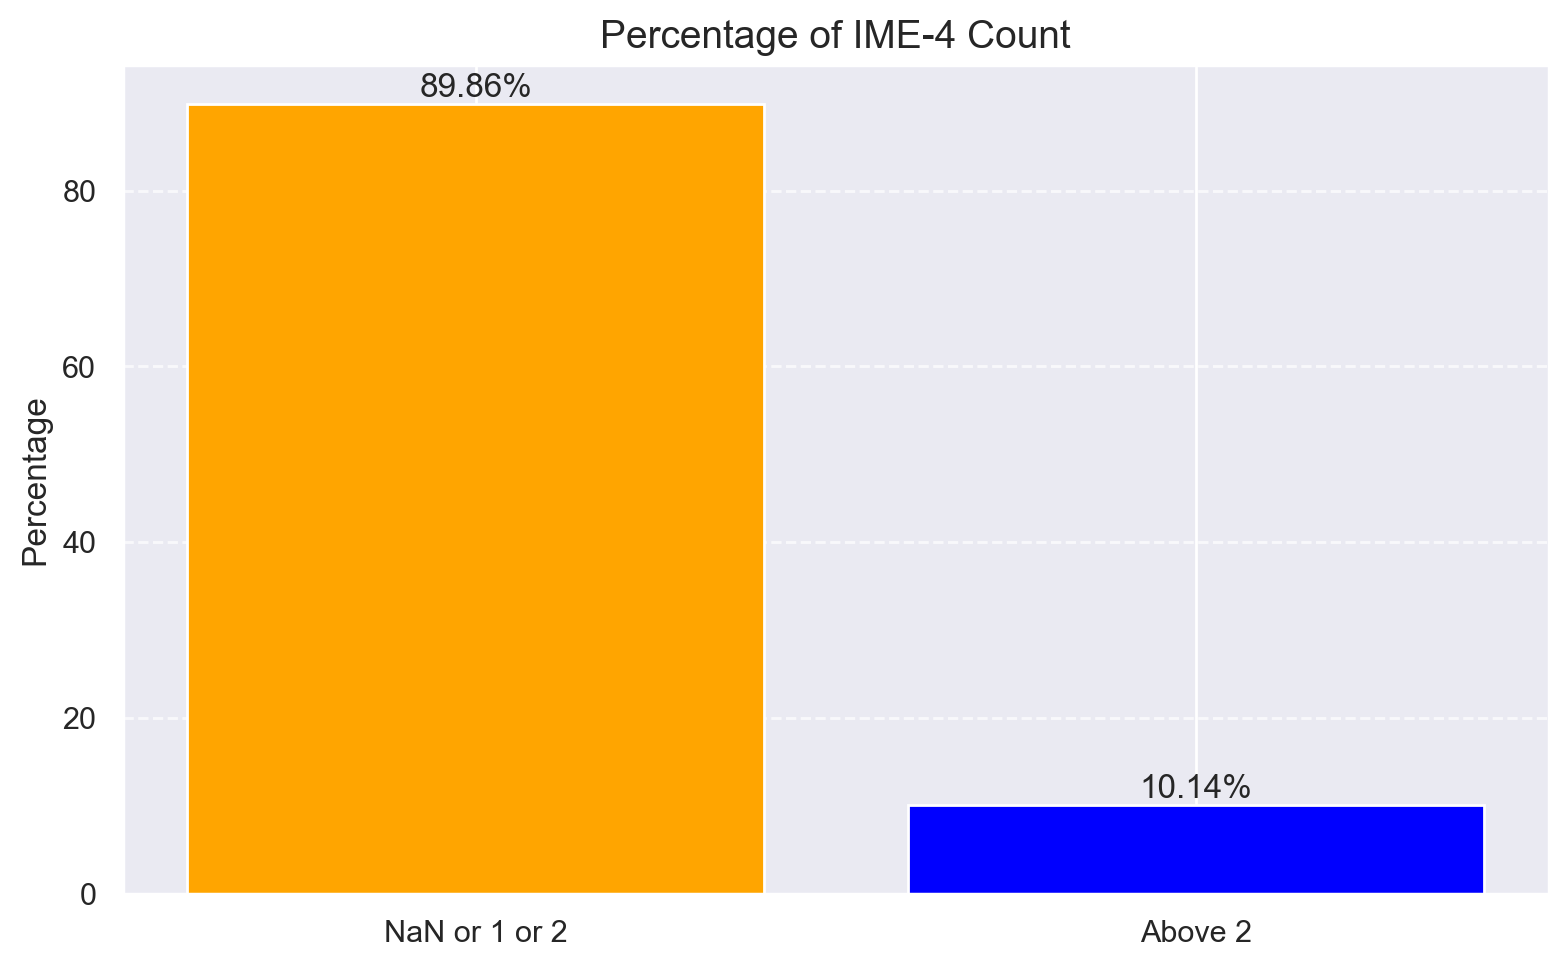

In [290]:
# Calculate the total number of entries
total_count = df_train_treat_missing['IME-4 Count'].count() + df_train_treat_missing['IME-4 Count'].isna().sum()

# Count NaN values and counts of 1 and 2
count_nan_or_1_or_2 = df_train_treat_missing['IME-4 Count'].isna().sum() + \
                      ((df_train_treat_missing['IME-4 Count'] == 1).sum()) + \
                      ((df_train_treat_missing['IME-4 Count'] == 2).sum())

# Count occurrences greater than 2
count_above_2 = (df_train_treat_missing['IME-4 Count'] > 2).sum()

# Create a summary DataFrame with percentages
summary_df = pd.DataFrame({
    'Category': ['NaN or 1 or 2', 'Above 2'],
    'Count': [count_nan_or_1_or_2, count_above_2]
})

# Calculate percentages
summary_df['Percentage'] = (summary_df['Count'] / total_count) * 100

# Create a bar chart for percentages
plt.figure(figsize=(8, 5))
bars = plt.bar(summary_df['Category'], summary_df['Percentage'], color=['orange', 'blue'])
plt.title('Percentage of IME-4 Count', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

**Conclusion:** As a large portion of the dataset (around 90%) either has no information on IME-4 forms (which could indicate 0 IME-4 forms received per claim) or reports very low counts, the column may not add valuable insights or predictive power in modeling contexts. Therefore, we decided to drop this variable

In [292]:
df_train_treat_missing.drop(columns="IME-4 Count", inplace=True)

**'First Hearing Date':** 
While this variable contains a significant proportion of missing values (73.73%), these missing values carry important information— a blank date indicates that the claim has not yet had a hearing. Therefore, we will retain this variable.

**'C-3 Date':** Similarly, C-3 Date also has a large proportion of missing values (67.39%). However, these missing values are meaningful because they may indicate that the form has not been received yet. Therefore, we will retain this variable.

Let's treat missing values (by row) 

Check the percentage and cumulative percentage of rows in the DataFrame based on the number of missing values

In [294]:
# Count the number of missing values per row
missing_counts = df_train_treat_missing.isna().sum(axis=1)

# Calculate the total number of rows
total_rows = len(df_train_treat_missing)

# Calculate the percentage of missing values per row
total_columns = df_train_treat_missing.shape[1]  # Total number of columns
missing_value_percentage_per_row = (missing_counts / total_columns) * 100

# Count the occurrences of each missing value percentage
missing_percentage_counts = missing_value_percentage_per_row.value_counts().sort_index()

# Calculate the percentage of rows corresponding to each unique count of missing values
perc_rows_count = missing_percentage_counts.values / total_rows * 100

# Create a DataFrame with missing values and their percentages
results_df = pd.DataFrame({
    'Missing Values (%)': missing_percentage_counts.index.round(2),
    'Rows Count (%)': perc_rows_count.round(2),
})

# Calculate cumulative percentage
results_df['Cumulative Rows Count (%)'] = perc_rows_count.cumsum().round(2)

# Set the index name
results_df.index.name = 'Missing Values'

# Display the results
results_df

,Missing Values (%),Rows Count (%),Cumulative Rows Count (%)
Missing Values,,,
0,0.00,14.62,14.62
1,3.33,19.02,33.64
2,6.67,51.37,85.01
3,10.00,10.91,95.92
4,13.33,1.26,97.18
5,16.67,0.13,97.31
6,20.00,0.04,97.35
7,23.33,0.07,97.43
8,26.67,0.40,97.82


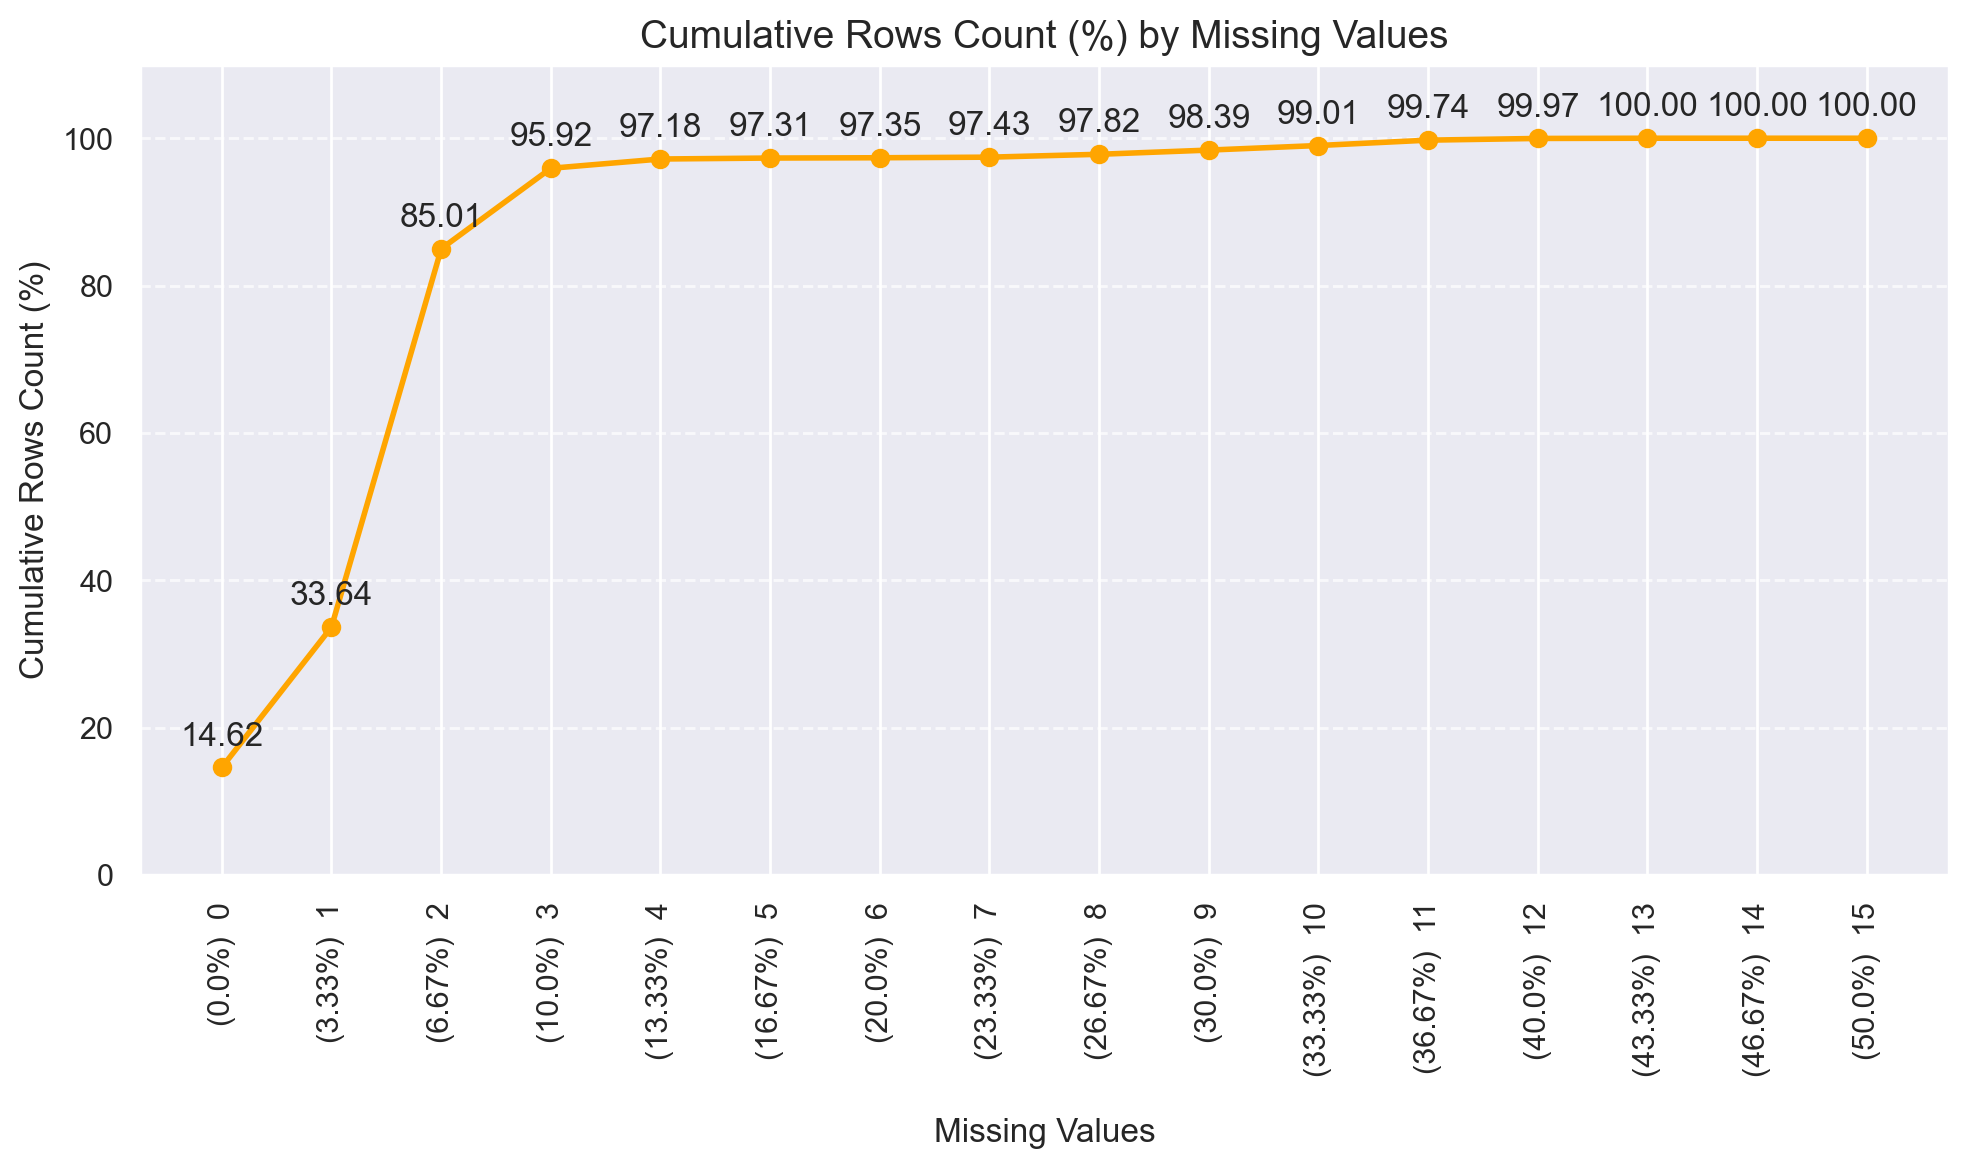

In [296]:
# Create formatted labels for the x-axis
results_df['Missing Values Labels'] = '(' + results_df['Missing Values (%)'].astype(str) + '%)  ' + results_df.index.astype(str)

# Create a line chart for cumulative rows count
plt.figure(figsize=(10, 6))

# Plot Cumulative Rows Count (%)
plt.plot(results_df['Missing Values (%)'], results_df['Cumulative Rows Count (%)'], marker='o', color='orange', linewidth=2, label='Cumulative Rows Count (%)')

# Add labels and title
plt.title('Cumulative Rows Count (%) by Missing Values', fontsize=14)
plt.xlabel('Missing Values', labelpad=15, fontsize=12)
plt.ylabel('Cumulative Rows Count (%)', fontsize=12)

# Set y-axis limits to start from 0
plt.ylim(0, 110)  # Adding a little space for the highest point

# Display custom labels on x-ticks
plt.xticks(results_df['Missing Values (%)'], results_df['Missing Values Labels'], rotation=90)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show data labels on the cumulative line
for index, value in enumerate(results_df['Cumulative Rows Count (%)']):
    plt.text(results_df['Missing Values (%)'].iloc[index], value + 3, f"{value:.2f}", ha='center')

# Show the plot
plt.tight_layout()
plt.show()

**Decision:** We decided to be a bit conservative and drop observations with 11 or more missing values (36.67% or more of missing values), affecting less than 1% of the dataset. This minimal loss of data ensures that we maintain a high-quality dataset without significantly impacting the analysis

In [298]:
# Print the shape of the original DataFrame
original_length = len(df_train_treat_missing)

# Define the threshold for missing values
threshold = 11  # More than 10 missing values

# Create a copy of the DataFrame to avoid modifying the original in place
df_train_treat_missing.dropna(thresh=df_train_treat_missing.shape[1] - threshold, inplace=True)

# Calculate the number of rows removed and the percentage
rows_removed = original_length - len(df_train_treat_missing)
percentage_removed = (rows_removed / original_length) * 100

# Print the number of rows removed and the percentage
print(f"Number of rows removed: {rows_removed} ({round(percentage_removed, 2)}%)")

Number of rows removed: 1502 (0.26%)


In [300]:
# Calculate the number of rows removed due to duplicates and missing values
total_rows_removed = len(df_train) - len(df_train_treat_missing)

# Calculate the percentage of rows removed
percent_total_rows_removed = total_rows_removed / len(df_train) * 100

# Print the results
print(f"Total rows removed until now: {total_rows_removed} ({round(percent_total_rows_removed, 2)}%)")

Total rows removed until now: 20994 (3.54%)


# 4.4 Data Types

- object to datetime:
  - 'Accident Date'
  - 'Assembly Date'
  - 'C-2 Date'
  - 'C-3 Date'
  - 'First Hearing Date' (missing values: a blank date means the claim has not yet had a hearing held)

- float to integer:
  - 'Age at Injury'
  - 'Birth Year'
  - 'IME-4 Count'
  - 'Number of Dependents': not in metadata (make assumption)

- object to binary:
  - 'Alternative Dispute Resolution'
  - 'Attorney/Representative'
  - 'COVID-19 Indicator'

In [302]:
df_train_adjust_dtypes = df_train_treat_missing.copy()

In [304]:
columns_object_to_datetime = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
columns_float_to_int = ['Age at Injury', 'Birth Year', 'Number of Dependents']
columns_object_to_binary = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']

In [306]:
df_train_adjust_dtypes[columns_object_to_datetime + columns_float_to_int + columns_object_to_binary].dtypes

Accident Date                      object
Assembly Date                      object
C-2 Date                           object
C-3 Date                           object
First Hearing Date                 object
Age at Injury                     float64
Birth Year                        float64
Number of Dependents              float64
Alternative Dispute Resolution     object
Attorney/Representative            object
COVID-19 Indicator                 object
dtype: object

In [308]:
df_train_adjust_dtypes[columns_object_to_datetime + columns_float_to_int + columns_object_to_binary].head().T

Claim Identifier,5393875,5393091,5393889,5393887,5393863
Accident Date,2019-12-30,2019-08-30,2019-12-06,2019-12-30,2019-12-26
Assembly Date,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01
C-2 Date,2019-12-31,2020-01-01,2020-01-01,2019-12-31,2019-12-31
C-3 Date,NaN,2020-01-14,NaN,NaN,NaN
First Hearing Date,NaN,2020-02-21,NaN,NaN,NaN
Age at Injury,31.0,46.0,40.0,61.0,67.0
Birth Year,1988.0,1973.0,1979.0,1958.0,1952.0
Number of Dependents,1.0,4.0,6.0,1.0,5.0
Alternative Dispute Resolution,N,N,N,N,N
Attorney/Representative,N,Y,N,N,N


In [310]:
# Convert multiple object columns to datetime
for col in columns_object_to_datetime:
    df_train_adjust_dtypes[col] = pd.to_datetime(df_train_adjust_dtypes[col]).dt.date  # Converts missing dates to NaT

# Convert multiple float columns to integers
for col in columns_float_to_int:
    df_train_adjust_dtypes[col] = df_train_adjust_dtypes[col].astype('Int64')  # Use 'Int64' for nullable integer type

# Convert multiple object columns to binary
for col in columns_object_to_binary:
    df_train_adjust_dtypes[col] = df_train_adjust_dtypes[col].map({'Y': 1, 'N': 0}).astype('Int64')  # Use 'Int64' for nullable integers

In [312]:
# Check data types
df_train_adjust_dtypes[columns_object_to_datetime + columns_float_to_int + columns_object_to_binary].dtypes

Accident Date                     object
Assembly Date                     object
C-2 Date                          object
C-3 Date                          object
First Hearing Date                object
Age at Injury                      Int64
Birth Year                         Int64
Number of Dependents               Int64
Alternative Dispute Resolution     Int64
Attorney/Representative            Int64
COVID-19 Indicator                 Int64
dtype: object

In [314]:
df_train_adjust_dtypes[columns_object_to_datetime + columns_float_to_int + columns_object_to_binary].head().T

Claim Identifier,5393875,5393091,5393889,5393887,5393863
Accident Date,2019-12-30,2019-08-30,2019-12-06,2019-12-30,2019-12-26
Assembly Date,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01
C-2 Date,2019-12-31,2020-01-01,2020-01-01,2019-12-31,2019-12-31
C-3 Date,NaT,2020-01-14,NaT,NaT,NaT
First Hearing Date,NaT,2020-02-21,NaT,NaT,NaT
Age at Injury,31,46,40,61,67
Birth Year,1988,1973,1979,1958,1952
Number of Dependents,1,4,6,1,5
Alternative Dispute Resolution,0,0,0,0,0
Attorney/Representative,0,1,0,0,0


# 4.5. Inconsistencies

- from the start of 2020 till the end of 2022

In [316]:
df_inconsistencies = df_train_adjust_dtypes.copy()

## Date Format

In [318]:
# Ensure 'Accident Date' is in datetime format
df_inconsistencies['Accident Date'] = pd.to_datetime(df_inconsistencies['Accident Date'], errors='coerce')

# Check for inconsistencies between 'Age at Injury', 'Accident Date', and 'Birth Year'
inconsistent_rows = df_inconsistencies[
    df_inconsistencies['Age at Injury'] != (df_inconsistencies['Accident Date'].dt.year - df_inconsistencies['Birth Year'])
]

# Display rows with inconsistencies
inconsistent_rows[['Age at Injury', 'Accident Date', 'Birth Year']]

,Age at Injury,Accident Date,Birth Year
Claim Identifier,,,
5394187,21,2019-12-14,0
5393907,62,2019-08-26,1956
5393931,30,2019-09-15,1988
5394053,53,2019-12-18,0
5393827,21,2019-12-26,0
...,...,...,...
6165417,59,2022-10-20,1962
6165584,29,2022-12-29,1994
6164295,45,2022-09-06,1976


In [320]:
inconsistent_rows[['Age at Injury', 'Accident Date', 'Birth Year']].describe()

,Age at Injury,Accident Date,Birth Year
count,267470.0,267470,267470.0
mean,41.99361,2021-03-11 15:27:50.775788032,1797.02164
min,0.0,1961-09-06 00:00:00,0.0
25%,31.0,2020-06-25 00:00:00,1963.0
50%,42.0,2021-04-23 00:00:00,1976.0
75%,53.0,2022-02-18 00:00:00,1988.0
max,115.0,2023-08-01 00:00:00,2018.0
std,13.972833,NaN,569.916921


## 'Zip-Code'

- Standard ZIP codes in NY are 5 digits long. Some locations use the extended ZIP+4 format, which is 9 digits in total.
- (If we only have the last four digits of a ZIP+4 code, it would be very difficult, if not impossible, to identify a specific address or home on its own.)
- [https://worldpopulationreview.com/zips/new-york]

In [322]:
count_invalid_zip_codes = df_inconsistencies[
    (df_inconsistencies["Zip Code"].astype(str).apply(len) != 5) & 
    (df_inconsistencies["Zip Code"].astype(str).apply(len) != 9) & 
    df_inconsistencies["Zip Code"].notna()
]
count_invalid_zip_codes

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5447424,2018-03-05,21,0,2020-03-09,1,1305.92,0,2020-04-14,2020-03-03,FEDERAL INSURANCE COMPANY,...,53.0,TWISTING,52.0,STRAIN OR TEAR,51.0,HIP,T2V,0.0,Not Work Related,4
5538122,2020-08-04,52,0,2020-08-14,1,540.00,0,2020-08-14,2020-08-19,STATE INSURANCE FUND,...,27.0,FROM LIQUID OR GREASE SPILLS,28.0,FRACTURE,34.0,WRIST,SLV,1.0,Not Work Related,6
5629816,2019-11-10,24,0,2021-01-06,1,0.00,0,2021-01-19,2020-12-28,STATE INSURANCE FUND,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,18.0,SOFT TISSUE,L9W,0.0,Not Work Related,0
5689543,2021-03-22,35,0,2021-03-29,1,1450.17,0,2021-03-29,2022-04-07,ACE AMERICAN INSURANCE CO,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",49.0,SPRAIN OR TEAR,55.0,ANKLE,P7G,0.0,Not Work Related,6
5734008,2021-05-21,34,0,2021-05-28,0,1244.35,1987,2021-05-28,NaT,MEMORIAL SLOAN KETTERING,...,56.0,LIFTING,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,10567.0,0.0,Not Work Related,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5939291,2022-02-12,28,0,2022-03-09,1,2289.38,0,2022-03-09,2023-06-14,STATE INSURANCE FUND,...,53.0,TWISTING,52.0,STRAIN OR TEAR,53.0,KNEE,K9J,0.0,Not Work Related,2
5949825,2020-10-11,25,0,2022-03-24,1,0.00,0,2022-04-26,2022-03-07,TRI-STATE INSURANCE COMPANY,...,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,55.0,ANKLE,M5R,0.0,Not Work Related,4
5984859,2022-04-30,30,0,2022-05-06,1,1455.54,0,2022-05-06,NaT,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",49.0,SPRAIN OR TEAR,53.0,KNEE,L1G,0.0,Not Work Related,6


In [324]:
df_with_letters_and_numbers = df_inconsistencies[df_inconsistencies['Zip Code'].str.contains(r'[A-Za-z]', regex=True) & df_inconsistencies['Zip Code'].str.contains(r'\d', regex=True)]
df_with_letters_and_numbers

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5399802,2019-12-21,25,0,2020-01-09,0,1631.50,0,2020-01-09,NaT,STATE INSURANCE FUND,...,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,52.0,UPPER LEG,L1N 5,0.0,Not Work Related,0
5404203,2020-01-11,29,0,2020-01-16,1,1401.17,0,2020-03-11,2021-07-01,ACE AMERICAN INSURANCE CO.,...,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,T1B0P,0.0,Not Work Related,5
5407348,2019-12-28,23,0,2020-01-17,0,0.00,0,2020-01-17,NaT,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",7.0,CONCUSSION,18.0,SOFT TISSUE,L6Y 1,0.0,Not Work Related,2
5413081,2020-01-21,27,0,2020-01-27,0,0.00,0,2020-01-27,NaT,STATE INSURANCE FUND,...,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,54.0,LOWER LEG,N2P 1,0.0,Not Work Related,3
5415188,2020-01-23,54,0,2020-01-28,0,0.00,0,2020-01-28,NaT,AIU INSURANCE CO,...,29.0,ON SAME LEVEL,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,H7X3Z,0.0,Not Work Related,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143240,2022-11-07,23,0,2022-11-29,0,0.00,0,2022-11-29,NaT,ARCH INSURANCE COMPANY,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,35.0,HAND,V1M2B,0.0,Not Work Related,2
6147711,2022-11-02,29,0,2022-12-06,0,0.00,0,2022-12-06,NaT,A I U INSURANCE COMPANY,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",43.0,PUNCTURE,36.0,FINGER(S),L2P0A,0.0,Not Work Related,3
6150118,2022-01-29,25,0,2022-12-09,1,1748.25,0,2022-12-20,2022-12-06,STATE INSURANCE FUND,...,53.0,TWISTING,52.0,STRAIN OR TEAR,55.0,ANKLE,L6L 1,0.0,Not Work Related,0


**Conclusion:** We have 319 rows that the zip-code contains letters. As we know, the zip-code in NY only contains numbers!

In [326]:
#M3K2B

df_with_letters_and_numbers[df_with_letters_and_numbers["Zip Code"] == "V6B2M"]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5826137,2021-06-14,26,0,2021-10-04,0,0.0,0,2021-10-02,NaT,TRI-STATE INSURANCE COMPANY,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,63.0,LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA,V6B2M,0.0,Not Work Related,4
5965183,2022-03-23,22,0,2022-04-11,0,0.0,1999,2022-04-09,NaT,TRI-STATE INS CO OF MINNESOTA,...,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,53.0,KNEE,V6B2M,0.0,Not Work Related,1
6009803,2022-05-27,22,0,2022-06-08,0,0.0,1999,2022-06-08,NaT,TRI-STATE INSURANCE COMPANY,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,24.0,LARYNX,V6B2M,0.0,Not Work Related,2
6045709,2022-07-19,28,0,2022-07-26,0,0.0,1993,2022-07-26,NaT,TRI-STATE INSURANCE COMPANY,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,54.0,LOWER LEG,V6B2M,0.0,Not Work Related,3
6046792,2022-07-02,25,0,2022-07-27,0,0.0,1996,2022-07-27,NaT,TRI-STATE INSURANCE COMPANY,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",28.0,FRACTURE,36.0,FINGER(S),V6B2M,0.0,Not Work Related,1
6050019,2022-07-26,29,0,2022-08-01,0,0.0,1992,2022-07-30,NaT,TRI-STATE INS CO OF MINNESOTA,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,52.0,UPPER LEG,V6B2M,0.0,Not Work Related,6
6052975,2022-07-30,26,0,2022-08-03,0,0.0,1996,2022-08-03,NaT,TRI-STATE INSURANCE COMPANY,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,V6B2M,0.0,Not Work Related,0
6054068,2022-06-28,29,0,2022-08-04,0,0.0,1992,2022-08-04,NaT,TRI-STATE INSURANCE COMPANY,...,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,52.0,UPPER LEG,V6B2M,0.0,Not Work Related,1
6072873,2022-08-20,26,0,2022-08-29,0,0.0,1995,2022-08-27,NaT,TRI-STATE INSURANCE COMPANY,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,58.0,GREAT TOE,V6B2M,0.0,Not Work Related,3


M3K2B --> 20 // "TRI-STATE INSURANCE COMPANY", todas com o mesmo average weekly wage, há uma maioria associada ao upper leg

M3K2C --> 13 // "TRI-STATE INSURANCE COMPANY", uma grande maioria com "STRAIN OR TEAR", praticamente todos com 0 no average weekly wage 

H1V2L --> 15 linhas, com um average igual a 0, associadas a "TRI-STATE INS CO OF MINNESOTA" e "TRI-STATE INSURANCE COMPANY"

H1V3S --> 23 linhas, average == 0, associadas a "TRI-STATE INSURANCE COMPANY" e "TRI-STATE INS CO OF MINNESOTA", 

V6T1Z --> 30 linhas, average de 0, "TRI-STATE INS CO OF MINNESOTA", "TRI-STATE INSURANCE COMPANY", 

V6B2M --> 11 linhas, average de 0, "TRI-STATE INS CO OF MINNESOTA", "TRI-STATE INSURANCE COMPANY"

## Minimum Age 

- The minimum age should be 18, as it is the legal age to start working.

In [328]:
df_inconsistencies[df_inconsistencies['Age at Injury'] < 18]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393971,2019-06-26,0,0,2020-01-02,0,0.0,0,NaT,NaT,AMERICAN ZURICH INSURANCE CO,...,NaN,NaN,NaN,NaN,NaN,NaN,11801,0.0,Not Work Related,1
5394788,2019-12-23,16,0,2020-01-02,0,0.0,2003,2020-01-02,NaT,PENNSYLVANIA MANUFACTURERS',...,32.0,ON ICE OR SNOW,40.0,LACERATION,14.0,EYE(S),11776,0.0,Not Work Related,4
5394093,2019-12-28,0,0,2020-01-02,0,0.0,0,2019-12-30,NaT,TWIN CITY FIRE INS CO.,...,55.0,HOLDING OR CARRYING,52.0,STRAIN OR TEAR,61.0,ABDOMEN INCLUDING GROIN,NaN,0.0,Not Work Related,5
5394068,NaT,0,0,2020-01-02,1,0.0,1959,NaT,2019-12-23,STARR INDEMNITY & LIABILITY CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Not Work Related,6
5393794,NaT,0,0,2020-01-02,1,0.0,1984,NaT,2019-12-27,LM INSURANCE CORP,...,NaN,NaN,NaN,NaN,NaN,NaN,13212,0.0,Not Work Related,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164933,NaT,0,0,2022-12-30,1,0.0,1972,2023-01-20,2022-12-22,LM INSURANCE CORP,...,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,39.0,WRIST (S) & HAND(S),11221,0.0,Not Work Related,6
6164795,2022-08-20,17,0,2022-12-30,0,0.0,2005,2022-12-30,NaT,SEQUOIA INSURANCE COMPANY,...,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,55.0,ANKLE,12149,0.0,Not Work Related,5
6164931,NaT,0,0,2022-12-30,1,0.0,1957,NaT,2022-12-27,"CNY OTHER THAN ED, HED WATER",...,NaN,NaN,NaN,NaN,NaN,NaN,11221,0.0,Not Work Related,0


**Conclusion:** We have 7201 people who are below 18 years old. We can drop these rows because they do not make sense in our context.

In [330]:
df_inconsistencies = df_inconsistencies[~((df_inconsistencies['Age at Injury'] < 18))]

In [332]:
# Check what is the mininum age 
df_inconsistencies['Age at Injury'].min()

18

**Conclusion:** The minimum age is 18, which is the legal age to start working. Values below 18 were correctly dropped.

In [334]:
#def calculate_age_at_accident(row):
    #start_date = row['Birth Year']
    #end_date = row['Accident Date']
    
    # Ensure the dates are in datetime format (if not already)
    #if isinstance(start_date, datetime) and isinstance(end_date, datetime):
        
        # Calculate the relativedelta between the two dates
        #delta = relativedelta.relativedelta(end_date, start_date)
        
        # Return the difference in years
        #return delta.years
    #else:
        #return None

In [350]:
#df_inconsistencies['Age at Accident'] = df_inconsistencies.apply(
    #lambda row: calculate_age_at_accident(row), axis=1
#)

In [346]:
# Checking the inconsistencies 
#df_inconsistencies[df_inconsistencies['Age at Injury'] != df_inconsistencies['Age at Accident']]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Age at Accident
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


**Conclusion:** The 'Age at Injury' is the age when the injury occurred, so it should be equal to the difference between the 'Birth Year' and the 'Accident Date'. There are 12,978 values that do not meet this condition (probably because the dates have not been properly set yet, but once corrected, the values should be accurate)

## 'Carrier Name' & 'Carrier Type'

In [362]:
carrier_names = df_inconsistencies['Carrier Name'].unique().tolist()
carrier_names.sort()
carrier_names

['*** CARRIER UNDETERMINED ***',
 'A I U INSURANCE COMPANY',
 'ABF FREIGHT SYSTEM, INC.',
 'ABF FREIGHT SYSTEMS INC DEL',
 'ACADIA INSURANCE COMPANY',
 'ACCIDENT FUND GENERAL',
 'ACCIDENT FUND GENERAL INS CO',
 'ACCIDENT FUND INSURANCE',
 'ACCIDENT FUND INSURANCE CO',
 'ACCIDENT FUND NATIONAL INS CO',
 'ACCIDENT FUND NATONAL INS CO',
 'ACCREDITED SURETY AND CASUALTY',
 'ACE AMERICAN INSURANCE CO',
 'ACE AMERICAN INSURANCE CO.',
 'ACE FIRE UNDERWRITERS',
 'ACE FIRE UNDERWRITERS INS',
 'ACE PROPERTY & CASUALTY INS CO',
 'ACE PROPERTY AND CASUALTY',
 'ACIG INSURANCE COMPANY',
 'ADDISON CENTRAL SCHOOL DISTRIC',
 'ADDISON CSD',
 'ADIRONDACK CENTRAL SCHOOL',
 'ADIRONDACK CSD',
 'ADMIRAL INDEMNITY COMPANY',
 'ADMIRAL INDEMNITY CORP.',
 'AIG PROPERTY CASUALTY CO.',
 'AIG PROPERTY CASUALTY COMPANY',
 'AIU INSURANCE CO',
 'AKRON CENTRAL SCHOOL DISTRICT',
 'AKRON CSD',
 'ALBANY CITY OF',
 'ALBANY CITY SCHOOL DISTRICT',
 'ALBANY, COUNTY OF',
 'ALBION CENTRAL SCHOOL DIST',
 'ALBION CENTRAL SCHOOL D

## 'First Hearing Date'

- 90-day period for scheduling the First Hearing Date typically begins from the date the claim is filed with the Workers' Compensation Board.
- If the case or claim is more complex or if there are delays (e.g., missing documentation or issues with the employer), the actual hearing may take longer to schedule, but 90 days is the standard guideline for the first hearing.

In [364]:
df_inconsistencies['First Hearing Date']

Claim Identifier
5393875           NaT
5393091    2020-02-21
5393889           NaT
5393887           NaT
5393863           NaT
              ...    
6165265           NaT
6165285           NaT
6165506           NaT
6165339           NaT
6165075           NaT
Name: First Hearing Date, Length: 565276, dtype: object

In [366]:
# Ensure both columns are in datetime format
df_inconsistencies['First Hearing Date'] = pd.to_datetime(df_inconsistencies['First Hearing Date'])
df_inconsistencies['C-3 Date'] = pd.to_datetime(df_inconsistencies['C-3 Date'])

# Calculate the difference
df_inconsistencies['Diference'] = df_inconsistencies['First Hearing Date'] - df_inconsistencies['C-3 Date']
df_inconsistencies[df_inconsistencies['Diference'].dt.days > 90]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Age at Accident,Diference
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393811,2019-12-19,34,0,2020-01-01,1,1682.39,1985,2020-01-01,2020-01-07,NYC TRANSIT AUTHORITY,...,49.0,SPRAIN OR TEAR,54.0,LOWER LEG,11788,0.0,Not Work Related,6,None,219 days
5394132,2019-12-09,44,0,2020-01-01,1,2115.00,1975,2020-01-01,2020-01-07,NYC TRANSIT AUTHORITY,...,10.0,CONTUSION,53.0,KNEE,10460,0.0,Not Work Related,5,None,653 days
5393898,2019-12-18,29,0,2020-01-01,0,610.72,1990,2020-01-01,2019-12-31,PROPERTY & CASUALTY INSURANCE,...,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",23.0,SPINAL CORD,12116,0.0,Not Work Related,1,None,476 days
5394183,2019-12-27,56,0,2020-01-01,1,815.20,1963,2019-12-31,2020-01-24,INDEMNITY INSURANCE CO OF,...,49.0,SPRAIN OR TEAR,34.0,WRIST,10475,0.0,Not Work Related,4,None,390 days
5394112,2019-11-30,51,0,2020-01-01,1,1404.89,1968,2019-12-31,2020-01-17,LM INSURANCE CORP,...,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11420,0.0,Not Work Related,6,None,122 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164515,2022-12-16,56,0,2022-12-30,1,1258.59,1966,2023-03-08,2022-12-27,"CNY OTHER THAN ED, HED WATER",...,49.0,SPRAIN OR TEAR,-9.0,MULTIPLE,10466,0.0,Not Work Related,6,None,230 days
6165181,2022-12-15,40,0,2022-12-30,1,860.38,1982,2022-12-30,2023-04-28,SYRACUSE CITY SCHOOL DISTRICT,...,10.0,CONTUSION,-9.0,MULTIPLE,13212,0.0,Not Work Related,1,None,132 days
6164439,2022-12-16,42,0,2022-12-30,1,1167.93,1980,2023-01-05,2022-12-28,"MARRIOTT INTERNATIONAL, INC",...,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",42.0,LOWER BACK AREA,10465,0.0,Not Work Related,2,None,159 days


## Date Consistency

- The sequence should be: Accident Date < C-2 Date < C-3 Date <Assembly Date < First Hearing Date 

In [373]:
df_inconsistencies[df_inconsistencies['Accident Date'] > df_inconsistencies['C-2 Date']]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Age at Accident,Diference
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5394177,2019-12-24,72,0,2020-01-01,1,273.27,0,2019-07-31,2020-01-30,AMERICAN ZURICH INSURANCE CO,...,52.0,STRAIN OR TEAR,39.0,WRIST (S) & HAND(S),20770,1.0,Not Work Related,4,None,113 days
5393953,2020-02-26,57,0,2020-01-01,1,1997.87,1962,2019-12-31,2020-01-31,"CNY OTHER THAN ED, HED WATER",...,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",31.0,UPPER ARM,11226,0.0,Not Work Related,0,None,94 days
5394099,2020-01-23,62,0,2020-01-02,1,1775.89,1957,2020-01-14,2019-12-27,NYC TRANSIT AUTHORITY,...,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11001,0.0,Not Work Related,3,None,161 days
5393830,2020-03-01,62,0,2020-01-02,1,1467.47,1957,2020-01-17,2019-12-27,STATE INSURANCE FUND,...,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),NaN,0.0,Not Work Related,1,None,245 days
5394613,2020-01-27,57,0,2020-01-03,1,1450.00,<NA>,2020-01-15,2019-12-30,NEW YORK CITY TRANSIT AUTH,...,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),28115,0.0,Not Work Related,5,None,611 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156163,2023-01-26,56,0,2022-12-16,1,2191.97,1966,2022-12-16,NaT,STATE INSURANCE FUND,...,52.0,STRAIN OR TEAR,-9.0,MULTIPLE,13316,0.0,Not Work Related,5,None,NaT
6158378,2022-12-27,41,0,2022-12-20,1,746.80,1981,2022-12-20,2022-12-20,AMERICAN GUAR & LIAB INS CO,...,49.0,SPRAIN OR TEAR,35.0,HAND,14569,0.0,Not Work Related,6,None,87 days
6160613,2023-02-07,51,0,2022-12-22,1,1646.06,1971,2022-12-22,2022-12-02,LIBERTY INSURANCE CORP.,...,78.0,CARPAL TUNNEL SYNDROME,35.0,HAND,14092,0.0,Not Work Related,3,None,97 days


**Conclusion:** We have 982 occurrences where the Accident Date is after the C-2 Date, which makes no sense.

# 4.6. Outliers

## 4.6.1 Outlier - Defining Features

In [127]:
df_outliers = df_train.copy()

- The way we work with metric features is different from the way we work with non-metric features, so we need to create lists of the different names of features and objects, with only the information about the types of features we want.

In [129]:
# defining metric and non-metric features 

non_metric_features = list(df_outliers.select_dtypes(exclude = np.number).set_index(df_outliers.index).columns) #todas as variaveis que são categóricas
metric_features = list(df_outliers.select_dtypes(include = np.number).set_index(df_outliers.index).columns) #apenas as que são numéricas (são as que interessam)

- Our first idea was test all the numeric features for outliers, but then we conclude that no make any sense: as the concept of outliers applies to continuous or discrete data with a broader range of values. So, we decided to include all variables except 'Agreement Reached' because is a binary variable and 'Number of Dependents'.

In [131]:
metric_features_final = ['Age at Injury','Average Weekly Wage', 'IME-4 Count', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']

- The same applies to the categorical variables, not all variables make sense to test

In [133]:
non_metric_features_final = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type', 'COVID-19 Indicator', 'District Name', 'Gender', 'Medical Fee Region']

## 4.6.2 Variables' Histograms

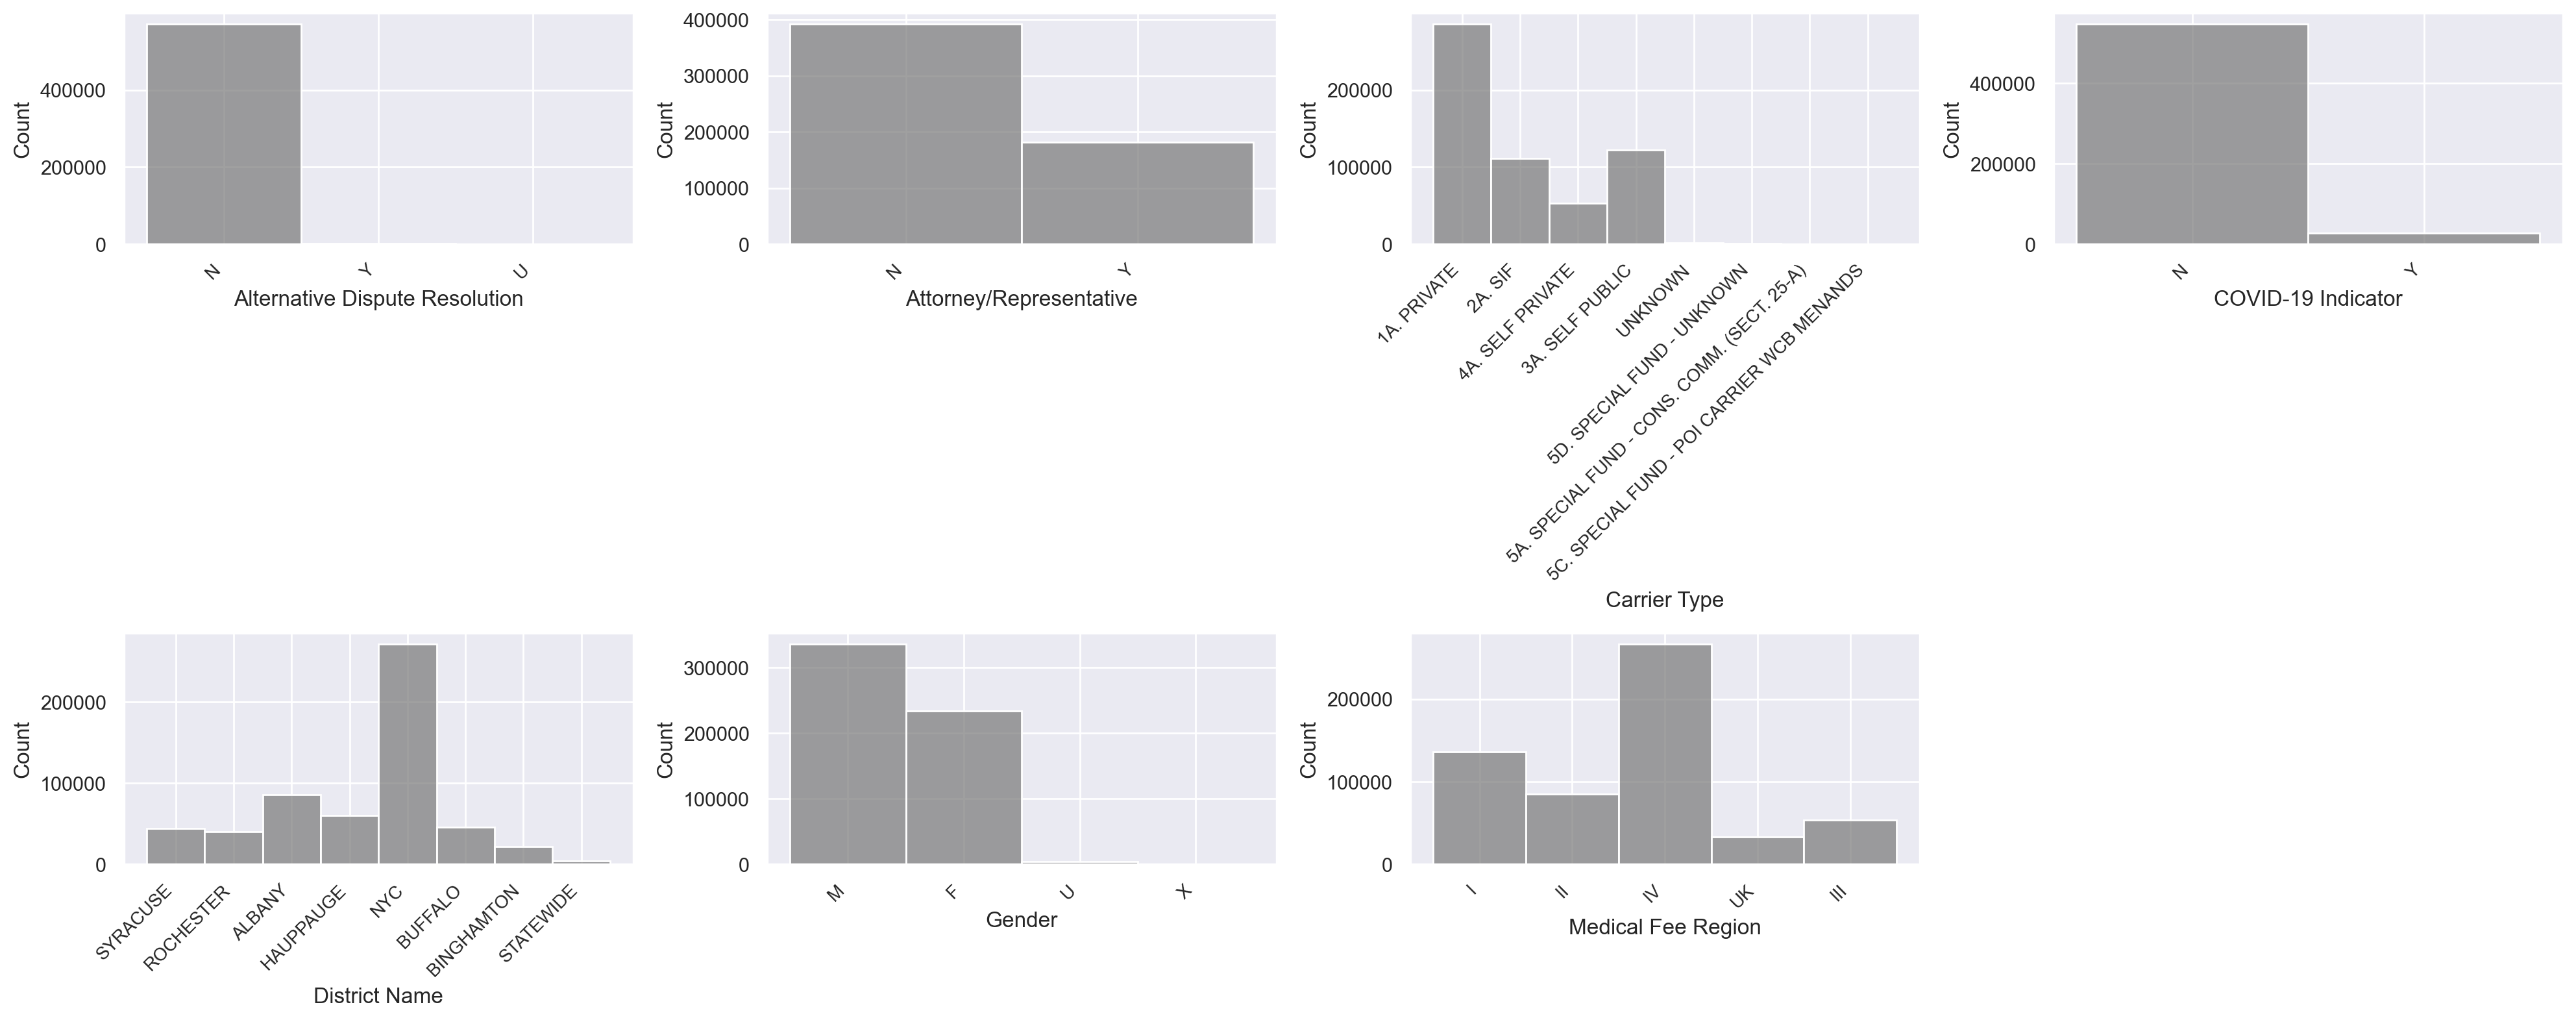

In [135]:
n_colums = min(4, len(non_metric_features_final))
n_rows = ceil(len(non_metric_features_final) / n_colums)

fig, axes = plt.subplots(n_rows, n_colums, figsize=(5 * n_colums, 4 * n_rows))

for i, column in enumerate(non_metric_features_final):
    row, col = divmod(i, n_colums)
    
    # Create histogram
    sns.histplot(data=df_outliers, x=column, ax=axes[row, col], color='grey')
    
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Hide any empty subplots
for j in range(i + 1, n_rows * n_colums):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

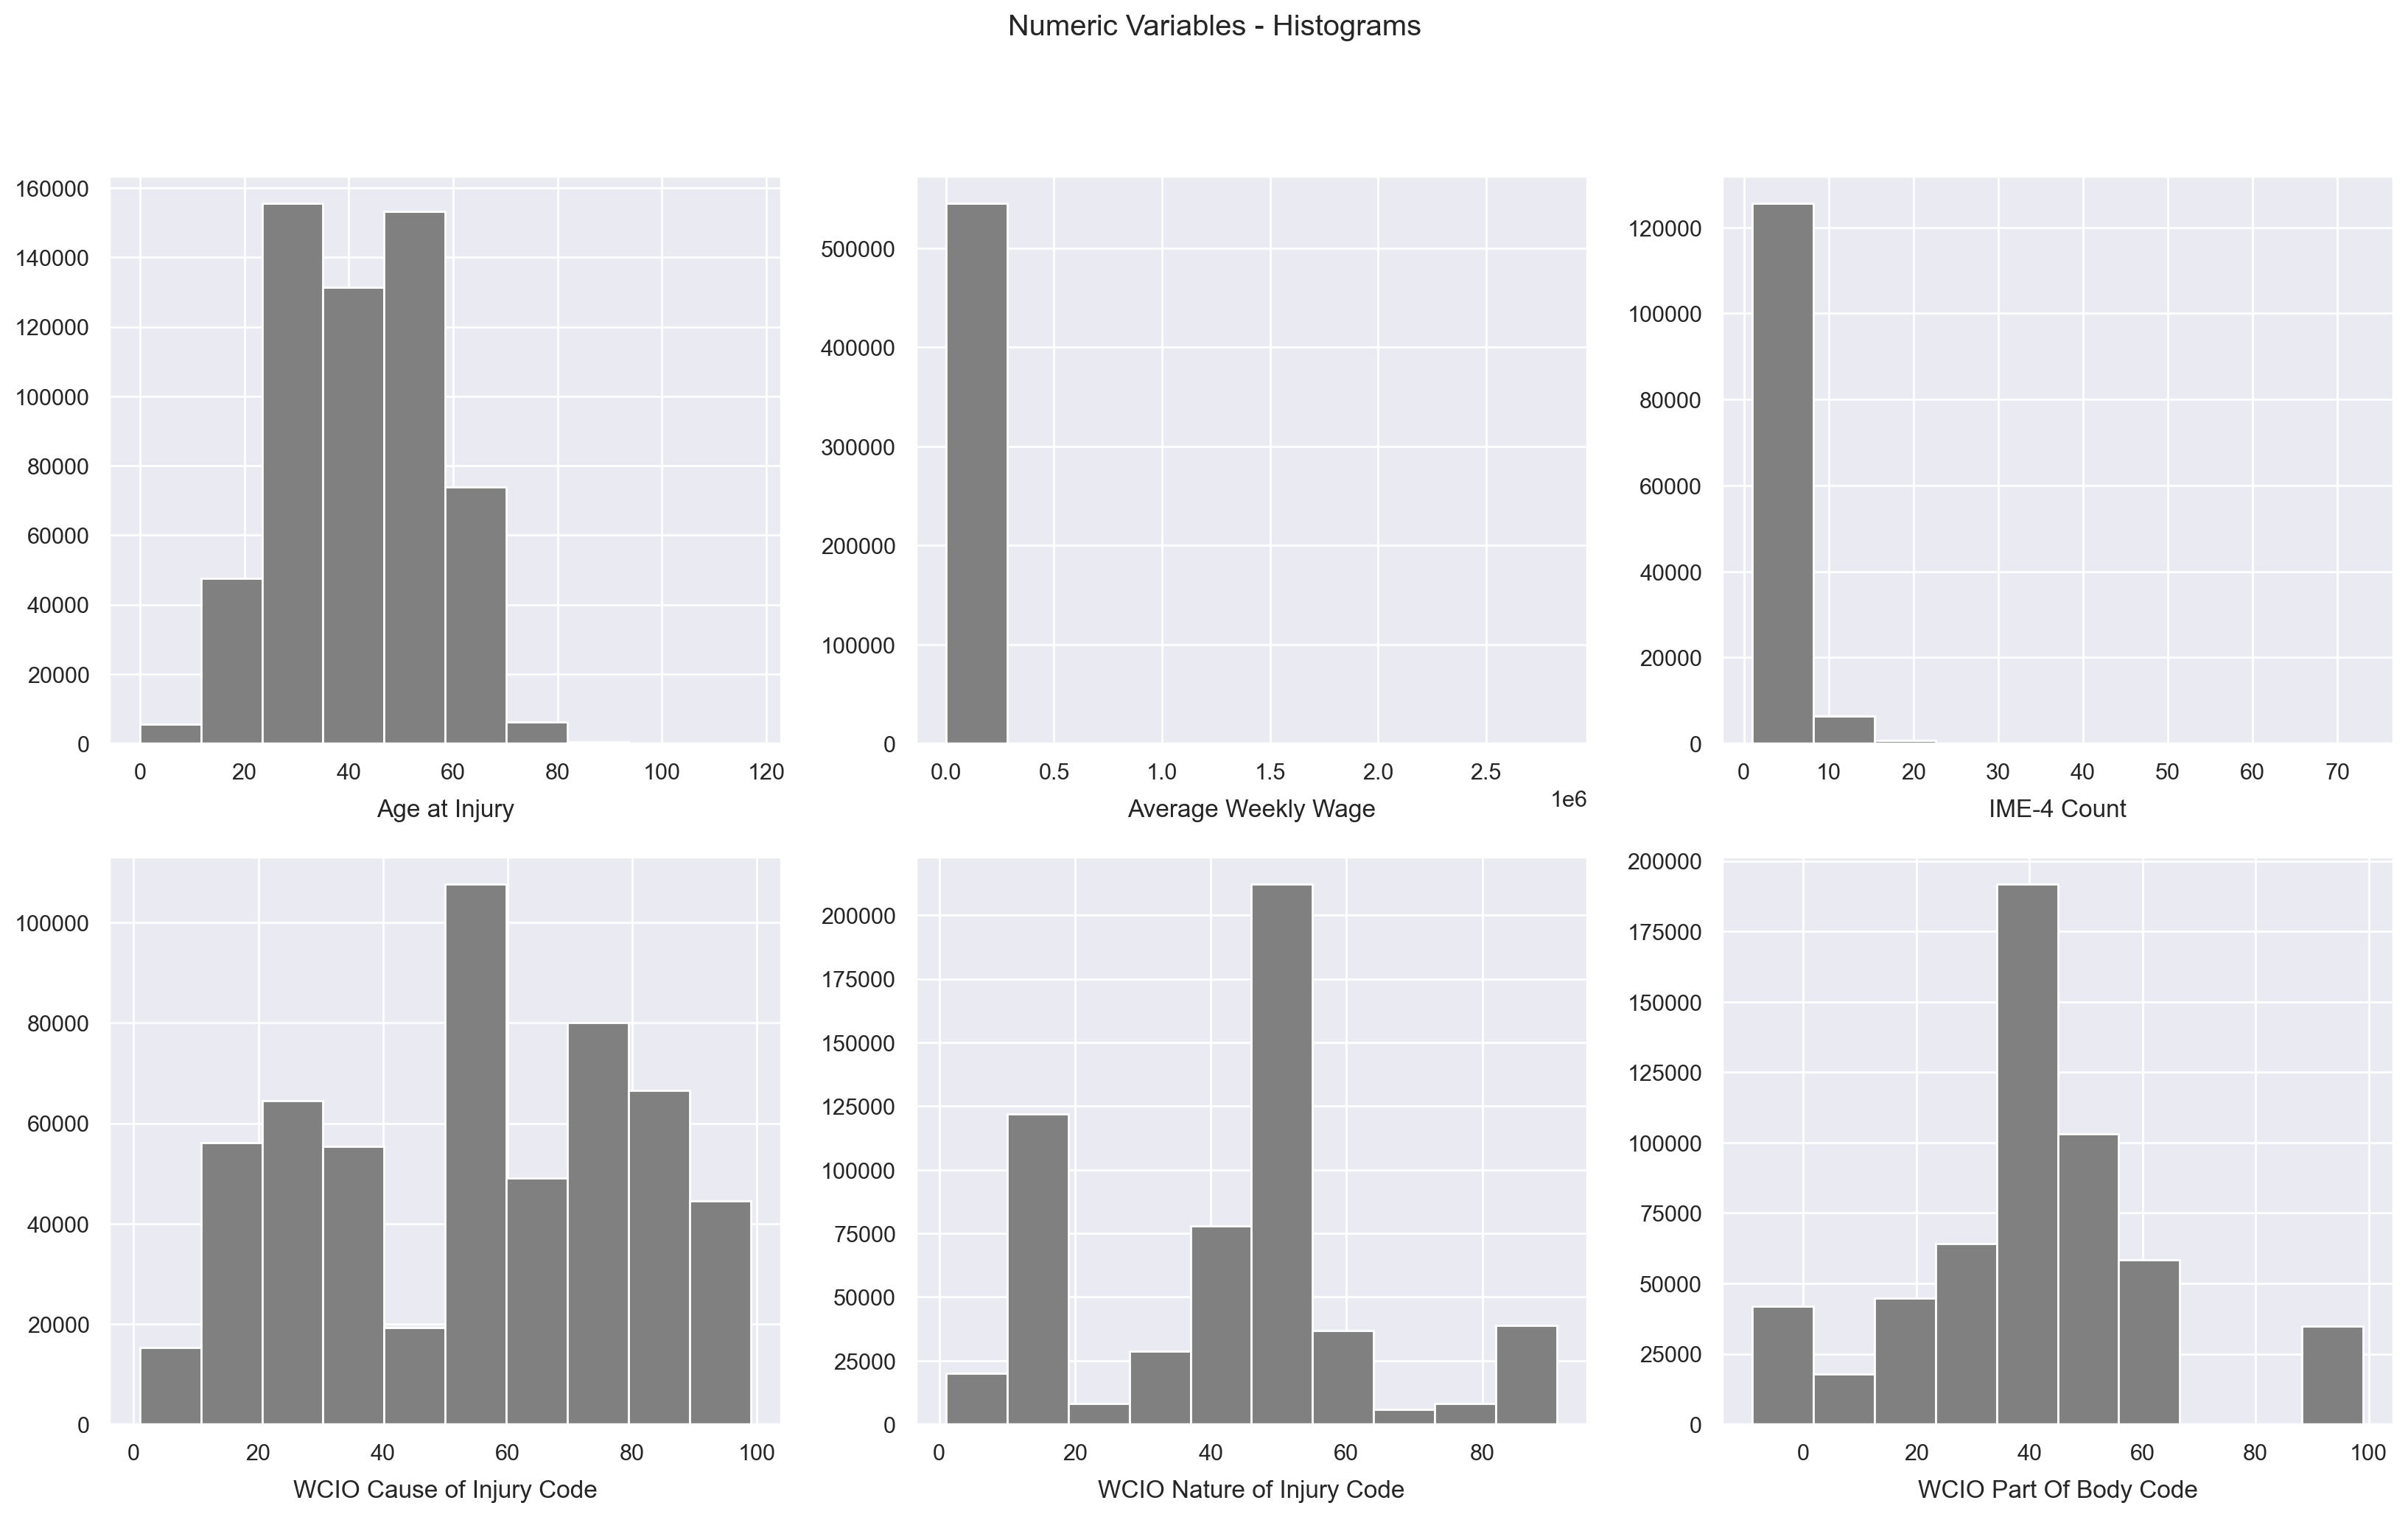

In [136]:
#we can plot all numeric features variables histograms in one figure. 
fig, axes = plt.subplots(2, ceil(len(metric_features_final) / 2), figsize = (20, 11))

# ploting the data
# iterating across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features_final):
    ax.hist(df_outliers[feat], bins = 10, color='grey')
    ax.set_title(feat, y = -0.15)

#Removing the empty axles
for ax in axes.flatten()[len(metric_features_final):]:
    fig.delaxes(ax)
    
# adding a centered title to the figure:
title = 'Numeric Variables - Histograms'
plt.suptitle(title)

# showing the plot
plt.show()

**Interpretation:** Upon analyzing the data, we can conclude that the "Age at Injury" distribution seems relatively uniform across ages 20 to 70, with a slight concentration at the extremes (ages close to 20 and 60). 
- The "Average Weekly Wage" variable displays a massive concentration of values near zero, with a few scattered values at very high levels (close to 1.5 million), this suggests the presence of extreme outliers.
- 'IME-4' have many low values and a few high ones, is common in data with outliers.

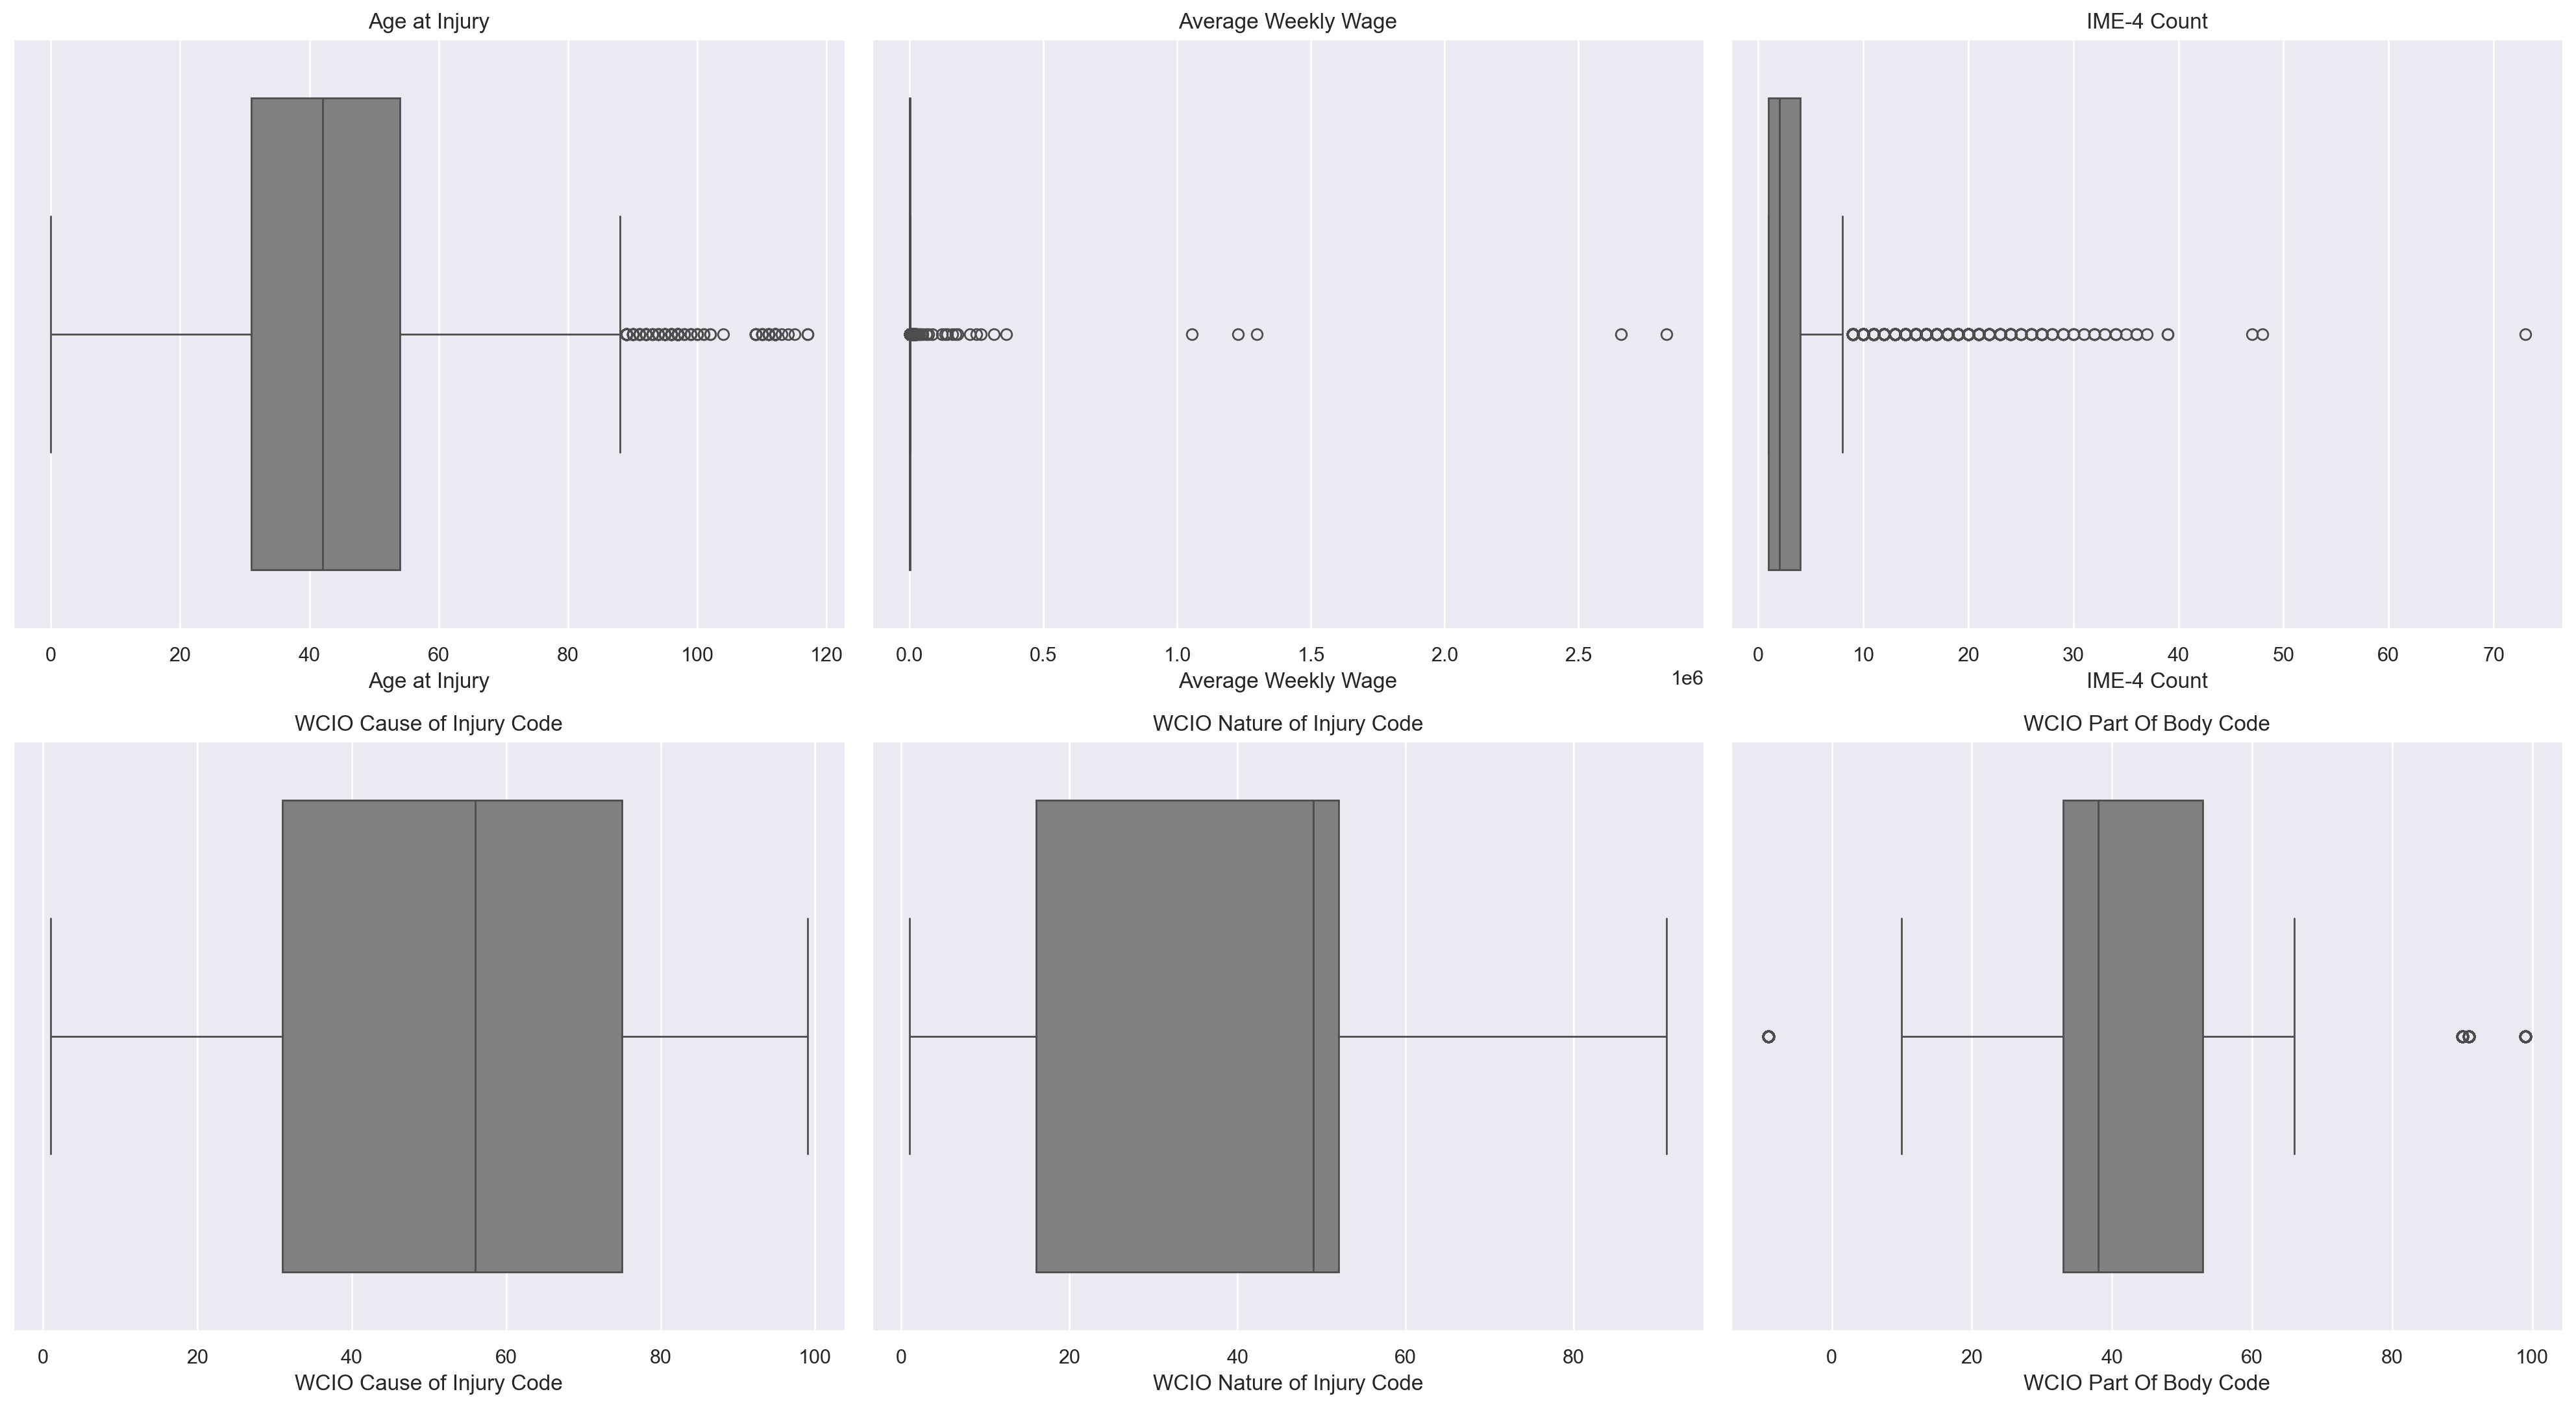

In [138]:
# Creating boxplots for each numerical feature
fig, axes = plt.subplots(2, ceil(len(metric_features_final) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features_final):
    sns.boxplot(data=df_outliers, x=feat, ax=ax, color='grey')
    ax.set_title(feat)

#Removing the empty axles
for ax in axes.flatten()[len(metric_features_final):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

- By analyzing the boxplots we concluded that we have to focus on the variables 'Age at Injury', 'Average Weekly Wage', 'IME-4 Count' and ' WCIO Part of body Code'

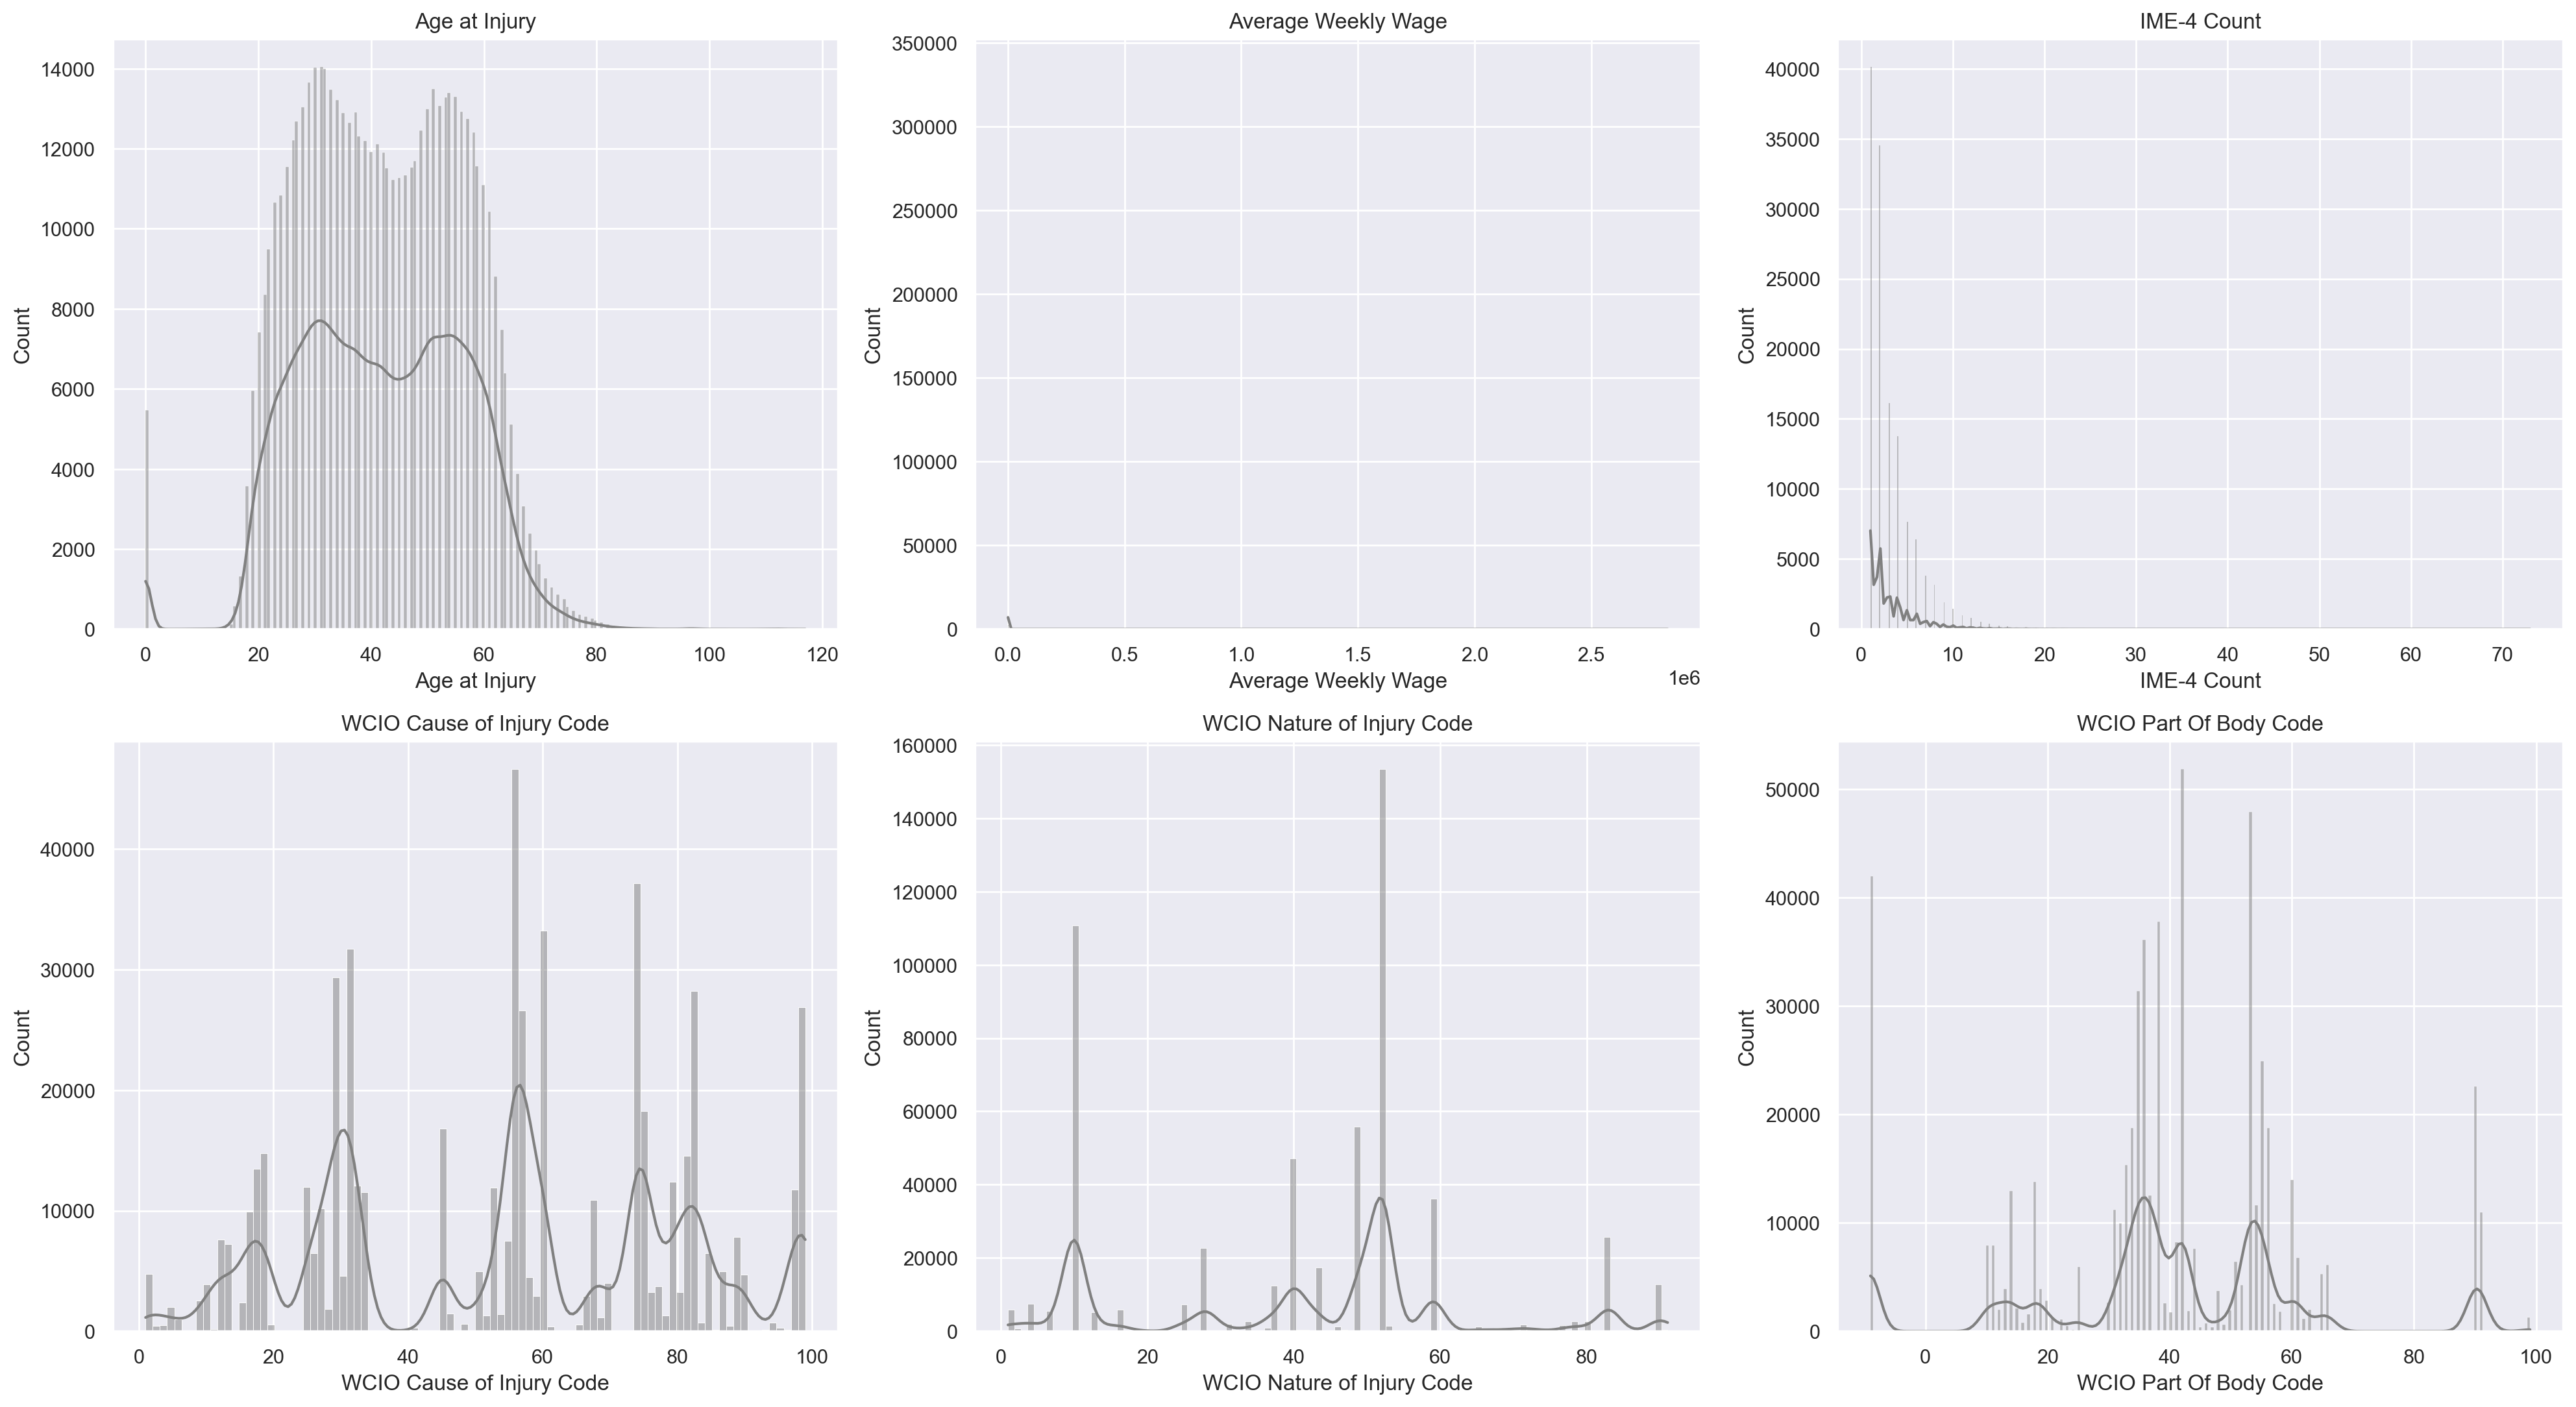

In [140]:
# Creating distribution plots (distplots) for numeric features
fig, axes = plt.subplots(2, ceil(len(metric_features_final) / 2), figsize=(20, 11))

# Loop through the numeric features and create distribution plots
for ax, feat in zip(axes.flatten(), metric_features_final):
    sns.histplot(data=df_outliers, x=feat, kde=True, ax=ax, color='grey')  # kde=True adds a kernel density estimate
    ax.set_title(feat)

#Removing the empty axles
for ax in axes.flatten()[len(metric_features_final):]:
    fig.delaxes(ax)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

## 4.6.3 Filtering

## 4.6.3.1 Filter 1 - IQR Method

We should as well solve the problem with the outliers: our initial idea was to use the **Z-score** method to identify and potentially remove outliers. However, this approach has its limitations, as it is only applicable to data columns that are normally distributed. Therefore, we decided to use the **Interquartile Range (IQR)** method to handle skewed distributions more effectively.

In [144]:
def Drop_Outliers_IQR(df, mf):

    Q1 = df[mf].quantile(0.25)
    Q3 = df[mf].quantile(0.75)
    IQR = (Q3 - Q1)

    upper_lim = Q3 + 1.5 * IQR
    lower_lim = Q1 - 1.5 * IQR
    
    # applying the calculated measures to filter the observations in our dataset and transforming the result into a pandas series
    filter = []
    for metric in mf:
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        filter.append(df[metric].between(llim, ulim, inclusive = 'both'))
        
    filter = pd.Series(np.all(filter, 0), index = df.index)
    
    # applying the filter to our dataframe
    df_filter = df[filter]

    return df_filter

In [145]:
outliers_filter1 = Drop_Outliers_IQR(df_outliers, metric_features_final)

In [146]:
# calculate the % of data after removing outliers

print('Percentage of data kept after removing outliers:', np.round((outliers_filter1.shape[0] / df_outliers[metric_features_final].shape[0]) * 100, 4))

Percentage of data kept after removing outliers: 14.8


**Conclusion:** As we can notice, this approach is problematic since it removes too much observations.

## 4.6.3.2 Filter 2 - Manual

In [149]:
filter2 = (
    (df_outliers["Age at Injury"] <= 100) 
    &
    (df_outliers["WCIO Part Of Body Code"] >= 10)
    #&
    #(df_outliers["IME-4 Count"] <= 73)
)

In [150]:
outliers_filter2 = df_outliers[filter2]
print('Percentage of data kept after removing outliers:', np.round(outliers_filter2.shape[0] / df_outliers.shape[0] * 100, 4))

Percentage of data kept after removing outliers: 86.7572


So, in this case we are removing 10% of our observations, which is acceptable. So we will keep this approach, but should as well test our models with the dataset with the outliers in order to see the diference in the performance.

On the manual filter we only included the variables `WCIO Part Of Body Code` and `Age at Injury` as these are the variables that are not acceptable in our case. 

**Interpretation:**  
- Not all the outliers in our dataset are true outliers. For instance, regarding 'Age at Injury', the average life expectancy in New York is around 80.3 years. However, exceptions exist; only 888 individuals in our dataset are over 80, which is relatively small compared to the overall range of ages. Ages exceeding 100 years are considered unrealistic, so we decided to exclude these (142 individuals).

- In the case of the 'WCIO Part Of Body Code', based on the WCIO tables, we conclude that the part of the body code must be a positive number. All other values are documented in the table. https://www.nycirb.org/digital-library/public/pdf_generate_paragraph?paragraph_id=A4E00D96-5539-4FD3-9489-41864CCC6503

- The 'IME-4 Count' is more challenging to assess. Some injuries may not require an IME-4 form, and there is no established maximum for how many forms a person can have. 

- 'Industry Code': https://www.naics.com/search-naics-codes-by-industry/ (all the numbers seem correct)
- 'WCIO Nature of Injury Code': https://www.nycirb.org/digital-library/public/pdf_generate_paragraph?paragraph_id=A4E00D96-5539-4FD3-9489-41864CCC6504 (same)
- 'Average Weekly Wage': It is not correct to consider higher values as outliers and vice versa. There are people who earn above average, just as there are people who earn below. In this case, it is correct to conclude that all values are acceptable.

### Insights 
- Ask teacher: about 'IME-4'

## 4.6.3.3 Filter 3 - Winsorization

Winsorizing the data involves replacing the income outliers with the nearest non-outlier values. This ensures that the extreme values are still accounted for in the analysis, but their impact is minimized.

In [156]:
df_test = df_train.copy()

In [157]:
def apply_winsorization(df, col):
    upper_limit = df[col].quantile(0.90)
    lower_limit = df[col].quantile(0.10)

    df[col] = np.where(df[col] >= upper_limit,
                       upper_limit,
                       np.where(df[col] <= lower_limit,
                                lower_limit,
                                df[col]))

    return df

In [158]:
# Check min/max values before winsorization
before_winsorization = {
    "Age at Injury": (df_outliers['Age at Injury'].min(), df_outliers['Age at Injury'].max()),
    "IME-4 Count": (df_outliers['IME-4 Count'].min(), df_outliers['IME-4 Count'].max()),
    "WCIO Part Of Body Code": (df_outliers['WCIO Part Of Body Code'].min(), df_outliers['WCIO Part Of Body Code'].max())
}

apply_winsorization(df_test, "Age at Injury")
apply_winsorization(df_test, "WCIO Part Of Body Code")
apply_winsorization(df_test, "IME-4 Count")

# Check min/max values after winsorization
after_winsorization = {
    "Age at Injury": (df_test['Age at Injury'].min(), df_test['Age at Injury'].max()),
    "IME-4 Count": (df_test['IME-4 Count'].min(), df_outliers['IME-4 Count'].max()),
    "WCIO Part Of Body Code": (df_test['WCIO Part Of Body Code'].min(), df_test['WCIO Part Of Body Code'].max())
}

print("Before Winsorization:", before_winsorization)
print("After Winsorization:", after_winsorization)

Before Winsorization: {'Age at Injury': (0.0, 117.0), 'IME-4 Count': (1.0, 73.0), 'WCIO Part Of Body Code': (-9.0, 99.0)}
After Winsorization: {'Age at Injury': (24.0, 61.0), 'IME-4 Count': (1.0, 73.0), 'WCIO Part Of Body Code': (11.0, 61.0)}


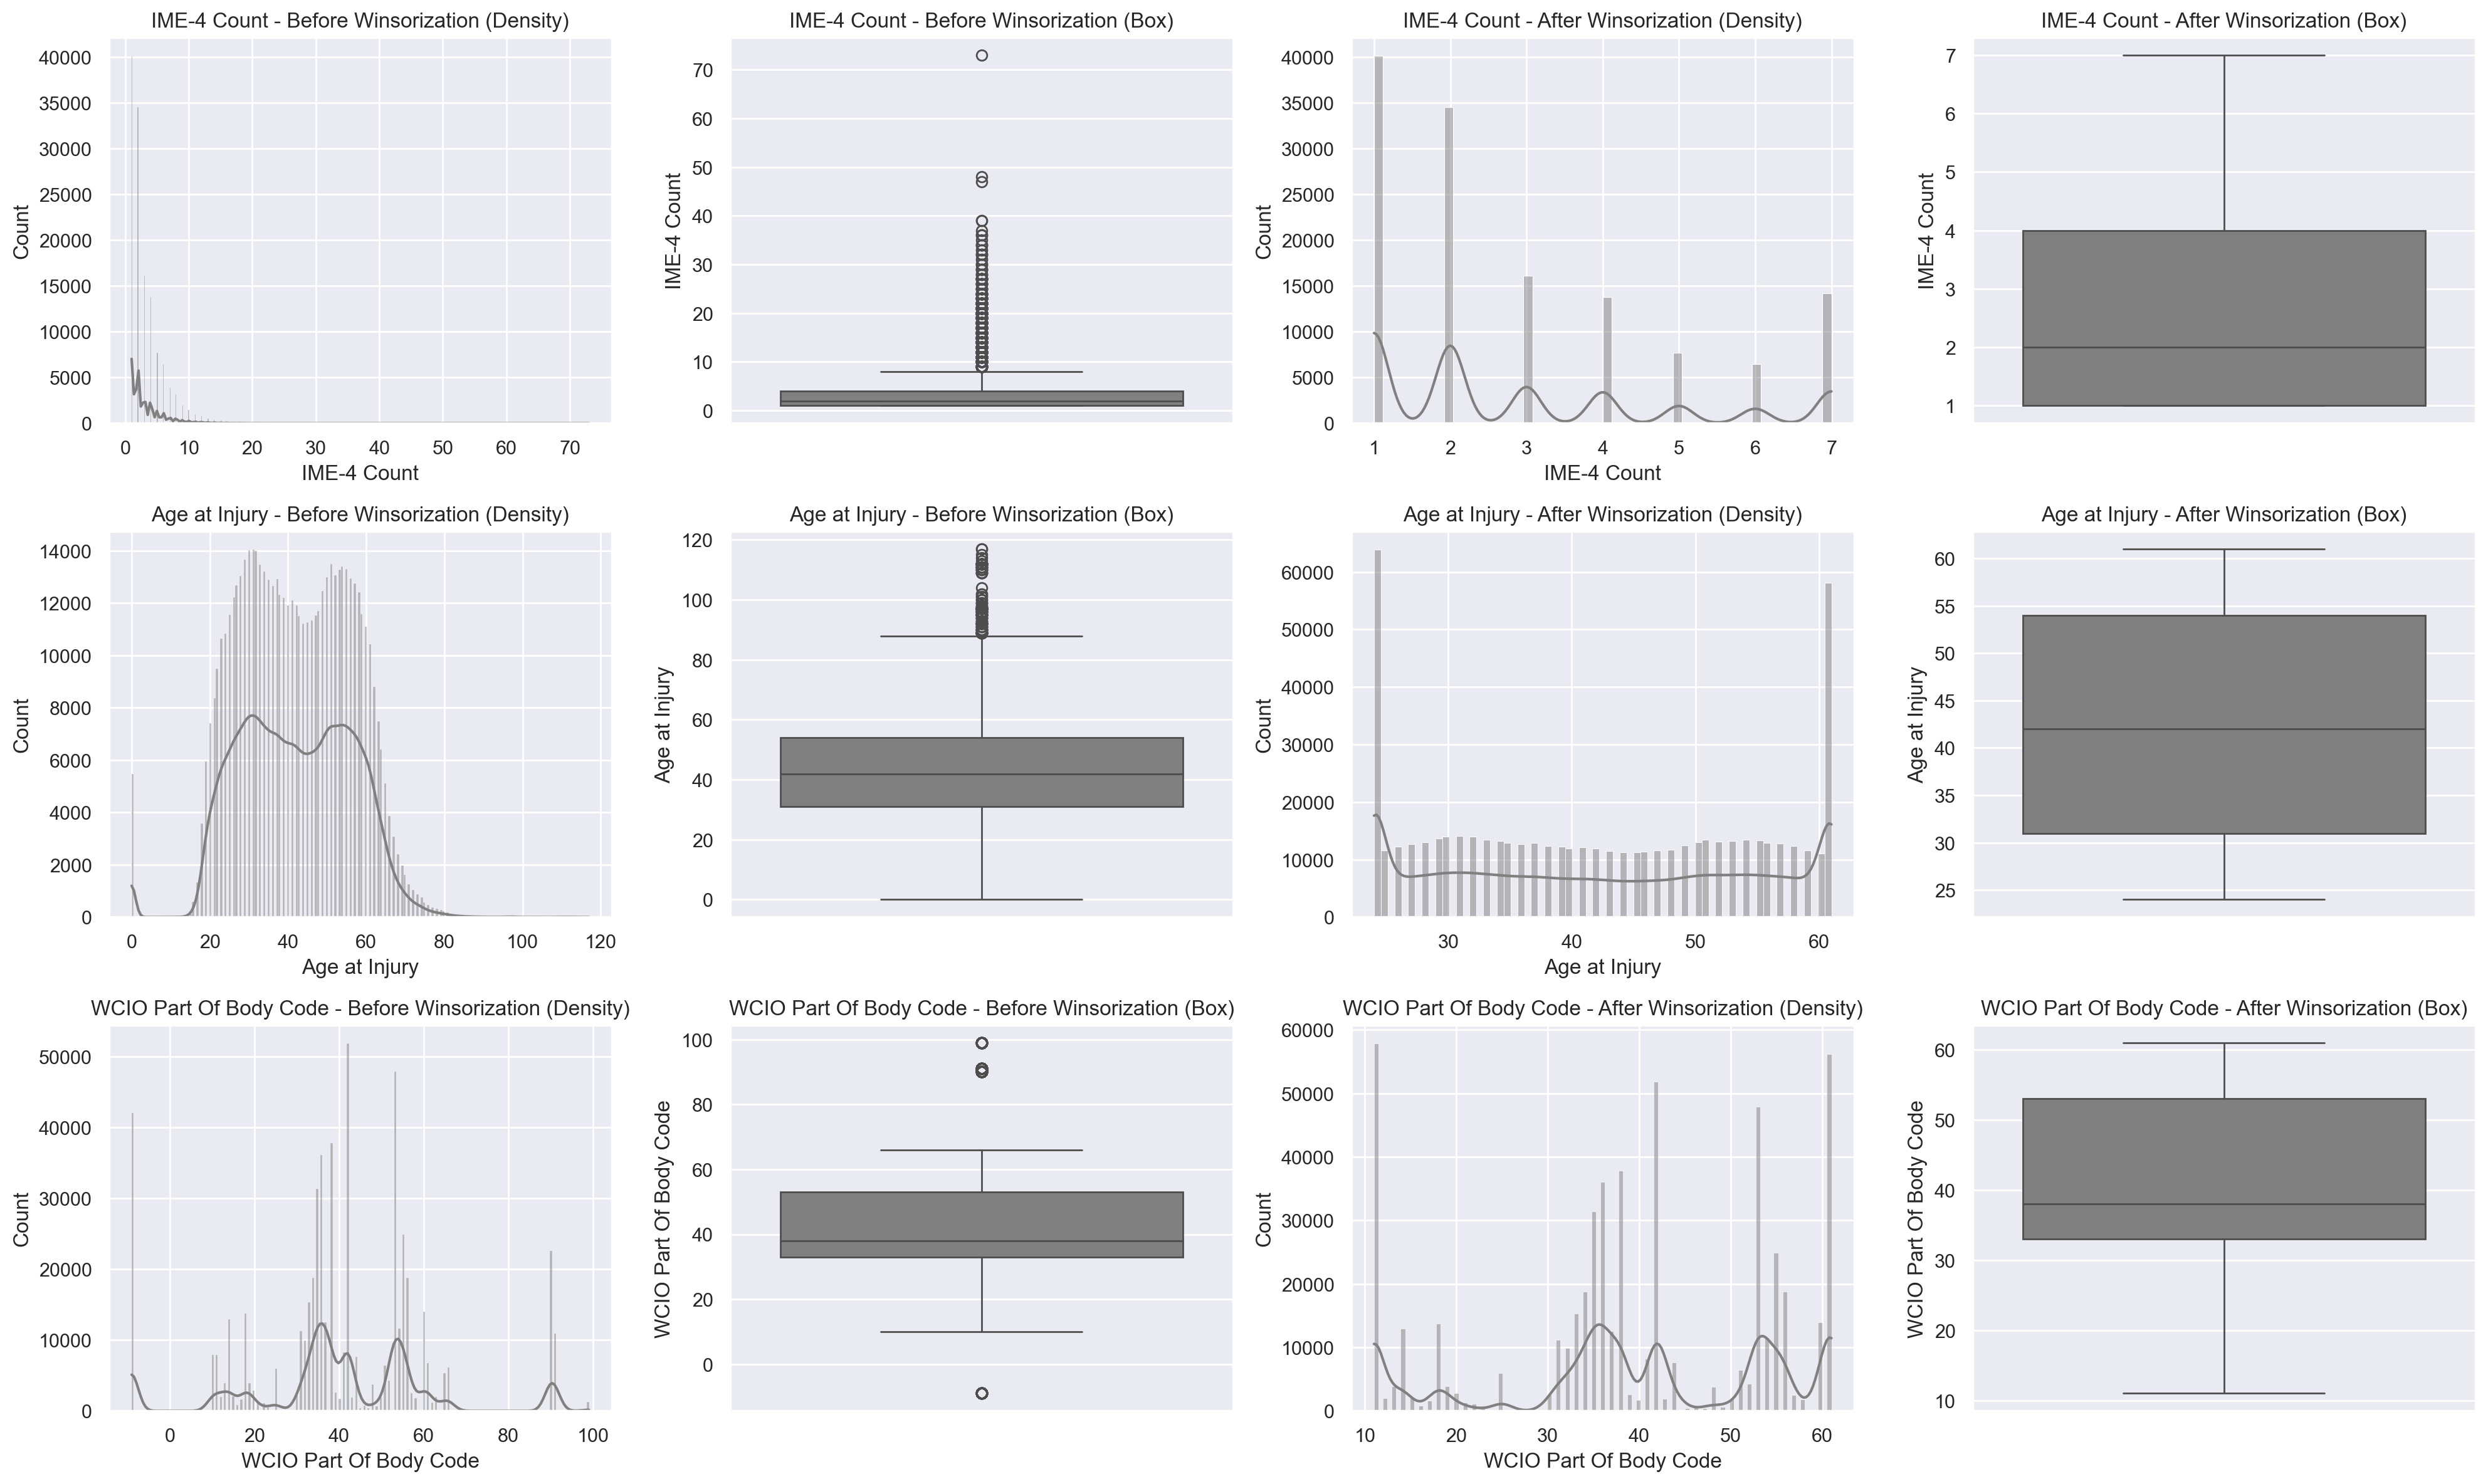

In [159]:
plt.figure(figsize=(20, 12))

# IME-4 Count
plt.subplot(3, 4, 1)
sns.histplot(df_outliers['IME-4 Count'], kde=True, color="grey")
plt.title('IME-4 Count - Before Winsorization (Density)')

plt.subplot(3, 4, 2)
sns.boxplot(y=df_outliers['IME-4 Count'], color="grey")
plt.title('IME-4 Count - Before Winsorization (Box)')

plt.subplot(3, 4, 3)
sns.histplot(df_test['IME-4 Count'], kde=True, color="grey")
plt.title('IME-4 Count - After Winsorization (Density)')

plt.subplot(3, 4, 4)
sns.boxplot(y=df_test['IME-4 Count'], color="grey")
plt.title('IME-4 Count - After Winsorization (Box)')

# Age at Injury
plt.subplot(3, 4, 5)
sns.histplot(df_outliers['Age at Injury'], kde=True, color="grey")
plt.title('Age at Injury - Before Winsorization (Density)')

plt.subplot(3, 4, 6)
sns.boxplot(y=df_outliers['Age at Injury'], color="grey")
plt.title('Age at Injury - Before Winsorization (Box)')

plt.subplot(3, 4, 7)
sns.histplot(df_test['Age at Injury'], kde=True, color="grey")
plt.title('Age at Injury - After Winsorization (Density)')

plt.subplot(3, 4, 8)
sns.boxplot(y=df_test['Age at Injury'], color="grey")
plt.title('Age at Injury - After Winsorization (Box)')

# WCIO Part Of Body Code
plt.subplot(3, 4, 9)
sns.histplot(df_outliers['WCIO Part Of Body Code'], kde=True, color="grey")
plt.title('WCIO Part Of Body Code - Before Winsorization (Density)')

plt.subplot(3, 4, 10)
sns.boxplot(y=df_outliers['WCIO Part Of Body Code'], color="grey")
plt.title('WCIO Part Of Body Code - Before Winsorization (Box)')

plt.subplot(3, 4, 11)
sns.histplot(df_test['WCIO Part Of Body Code'], kde=True, color="grey")
plt.title('WCIO Part Of Body Code - After Winsorization (Density)')

plt.subplot(3, 4, 12)
sns.boxplot(y=df_test['WCIO Part Of Body Code'], color="grey")
plt.title('WCIO Part Of Body Code - After Winsorization (Box)')

plt.tight_layout()
plt.show()

## 4.6.3.3 Filter 4 - LOF?

# TRAIN-VAL SPLIT

In [162]:
# creating an object named X that will contain the independent variables and another object named y that will contain the dependent variable/target

X = df_train.drop('Claim Injury Type', axis = 1)
y = df_train['Claim Injury Type']

In [163]:
# dividing the X into X_train and X_val, the y into y_train and y_val

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, 
                                                  random_state=0, 
                                                  stratify=y, 
                                                  shuffle=True)

ValueError: Input contains NaN

<img src="01_images/phase04.png" alt="Drawing" style="width: 500px;"/>

After the exploration and understanding of data, we need to fix possible problems on data like missing values or outliers and we can create new variables in order to get variables with higher predictive power. <br>
At this moment, we are going to ignore this. <br>However, to create a predictive model we need to identify what are our independent variables and the dependent one (the target), as also we need to split our data into at least two different datasets - the train and the validation.

__`Step 11`__ Create a new dataset named as `X` that will include all the independent variables.

In [ ]:
X = drugs_truth.iloc[:,:-1]

In [ ]:
# or
# X = drugs_truth.drop(columns = 'DrugPlant')

In [ ]:
X

__`Step 12`__ Create a new dataset named as `y` that will include the dependent variable (the last column - DrugPlant)

In [ ]:
y = drugs_truth.iloc[:,-1]

In [ ]:
# or
# y = drugs_truth['DrugPlant']

In [ ]:
y

__`Step 13`__ Using the `train_test_split()`, split the data into train and validation, where the training dataset should contain 70% of the observations. (We are going to talk more about this in a future class). 

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X,y,
                                                               train_size = 0.7, 
                                                               shuffle = True, 
                                                               stratify = y) # to have the same percentage of 1s in train and test data 

# 4.3. Missing Values Imputation

# 5. Creating New Features 

3.2. New features
We can create multiple new variables in order to try to extract some useful information. Some examples are:

Age gives us the age of the patient, based on the BirthYear and the current year.

In [ ]:
df_train_treat_missing = df_train_treat_missing.loc[:,~df_train_treat_missing.columns.isin(['Industry Code','WCIO Cause of Injury Code',
                                                                   'WCIO Nature of Injury Code','WCIO Part Of Body Code','IME-4 Count'])]

In [ ]:
claim_injury_severity = []
for i in df_train_treat_missing.index:
    claim_injury_severity.append(int(df_train_treat_missing["Claim Injury Type"][i][0]))

df_train_treat_missing["Claim Severity"] = claim_injury_severity 
df_train_treat_missing["Claim Severity"]# a rank of how much will be lost in monetary terms. 8 represents high monetary loss, 1 low monetary loss

In [ ]:
df_train_treat_missing["Claim Injury Type"] = df_train_treat_missing['Claim Injury Type'].str.replace(r'^\d+\.', '', regex=True)
df_train_treat_missing["Claim Injury Type"]

In [ ]:
def clean_carrier_type(carrier):
    if isinstance(carrier, str):  # Check if the carrier is a string
        return carrier.split('.', 1)[-1].strip() if '.' in carrier else carrier.strip()
    return carrier  # Return the value unchanged if it's not a string (e.g., NaN)

df_train_treat_missing["Carrier Type"] = df_train_treat_missing["Carrier Type"].apply(clean_carrier_type)
df_train_treat_missing["Carrier Type"]

In [ ]:
damage = {"no recovery time needed":["NO PHYSICAL INJURY"], 
         "short term recovery": ["CONTUSION", "SPRAIN OR TEAR", "STRAIN OR TEAR", "BURN", "INFECTION", "CRUSHING", "SYNCOPE"],
         "mid term recovery": ["VDT-RELATED DISEASES","FOREIGN BODY","CONCUSSION", "LACERATION", "FRACTURE", "DISLOCATION", "RUPTURE", "HERNIA" ,"DERMATITIS", "AMPUTATION", "VISION LOSS"],
         "long term recovery": ["LOSS OF HEARING","INFLAMMATION" ,"ANGINA PECTORIS" ,"CARPAL TUNNEL SYNDROME", "HEARING LOSS OR IMPAIRMENT" ,"MENTAL STRESS" ,"ELECTRIC SHOCK" ,"DUST DISEASE, NOC" ,"ASBESTOSIS" ,"SILICOSIS" ,"RADIATION" ,"HEPATITIS C"],
         "permanent damage": ["AIDS","ENUCLEATION","SEVERANCE","RESPIRATORY DISORDER","PUNCTURE","MULTIPLE PHYSICAL INJURIES ONLY" ,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC" ,"ALL OTHER SPECIFIC INJURIES, NOC" ,"ALL OTHER CUMULATIVE INJURY, NOC" ,"MENTAL DISORDER" ,"CONTAGIOUS DISEASE" ,"MYOCARDIAL INFARCTION" ,"CANCER" ,"COVID-19" ,"ADVERSE REACTION TO A VACCINATION OR INOCULATION" ,"FREEZING" ,"BLACK LUNG" ,"BYSSINOSIS" ,"POISONING - GENERAL (NOT OD OR CUMULATIVE)" ,"POISONING - CHEMICAL, (OTHER THAN METALS)" ,"POISONING - METAL" ,"MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL" ,"HEAT PROSTRATION"]}

damage_flat = {injury: recovery_time for recovery_time, injuries in damage.items() for injury in injuries}

# Function to assign expected recovery time
def assign_recovery_time(injury):
    return damage_flat.get(injury, np.nan)

df_train_treat_missing["Expected Recovery Time"] = df_train_treat_missing["WCIO Nature of Injury Description"].apply(assign_recovery_time)

df_train_treat_missing["Expected Recovery Time"]



In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
cat_var = df_train_treat_missing[['Accident Date',
                                  'Alternative Dispute Resolution',
                                  'Assembly Date', 
                                  'Attorney/Representative',
                                  'Birth Year', 
                                  'C-2 Date', 
                                  'C-3 Date', 
                                  'Carrier Name', 
                                  'Carrier Type',
                                  'County of Injury', 
                                  'COVID-19 Indicator',
                                  'District Name', 
                                  'First Hearing Date', 
                                  'Gender',
                                  'Industry Code Description', 
                                  'Medical Fee Region',
                                  'WCIO Cause of Injury Description', 
                                  'WCIO Nature of Injury Description',
                                  'WCIO Part Of Body Description', 
                                  'Zip Code', 
                                  'Agreement Reached',
                                  'WCB Decision',
                                  'Claim Severity',
                                  'Expected Recovery Time']]

target = df_train_treat_missing["Claim Injury Type"]


def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)


for var in cat_var:
    TestIndependence(cat_var[var],target, var)


# 5. Modelling - Create a predictive model

It is time to create a model. At this step, we are going to implement a simple algorithm named as "Decision Trees". 

<img src="01_images/phase05.png" alt="Drawing" style="width: 500px;"/>

__`Step 14`__ Create an instance of a DecisionTreeClassifier named as `dt` with the default parameters and fit the instance to the training data (again, we are going to talk more about this later).

In [ ]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

__`Step 15`__ Using the model just created in the previous step, predict the values of the target in the train dataset using the method `.predict()`. Assign those values to the object `predictions_train`

In [ ]:
predictions_train = dt.predict(X_train)

__`Step 16`__ Similarly to what you have done in the previous step, predict the target values for the validation dataset and assign those values to the object `predictions_val`

In [ ]:
predictions_val = dt.predict(X_validation)

# 6. Assess

We already have the ground truth and the predicted values. In this way we can start evaluating the performance of our model in the train and the validation dataset.

<img src="01_images/phase06.png" alt="Drawing" style="width: 500px;"/>

__`Step 17`__ Using the method `.score()`, check the mean accuracy of the model `dt`in the train dataset.

In [ ]:
dt.score(X_train, y_train)

__`Step 18`__ Similarly to what you have done in step 17, check the mean accuracy now for the validation dataset.

In [ ]:
dt.score(X_validation, y_validation)

Are we dealing with a case of __overfitting__? <br>
Yes, decision trees are known to be prone to overfitting. <br>
Luckily, there are strategies to avoid this problem. <br>
We are going to understand better what is overfitting and how to avoid it in the different algorithms in the next classes.

It is time to check the confusion matrix of the model for the training and the validation dataset. <br> <br>
__`Step 19`__ Check the confusion matrix for the training dataset, passing as parameters the ground truth (y_train) and the predicted values (predictions_train)<br>
[[TN, FP],<br>
[FN. TP]]

In [ ]:
confusion_matrix(y_train, predictions_train)

__`Step 20`__ Do the same for the validation dataset.

In [ ]:
confusion_matrix(y_validation, predictions_val)

__Can we conclude something from the results above?__ <br>It seems that our model is not so good at predicting the 1's in the target. <br>__Why?__ <br>Because we are dealing with an unbalanced dataset (more about this in the future). 

We are going to learn also different metrics that allow to understant better the performance of our model in unbalanced datasets - the mean accuracy is not a good metric to evaluate those cases.

# 7. Deploy

In the end, we want to classify the unclassified data. If we are already satisfied with our model, we can now predict the target to the new dataset.

__`Step 21`__ Check the dataset that we want to classify, imported as `drugs_2classify`

In [ ]:
# test data
drugs_2classify

__`Step 22`__ Using the `.predict()` method and the model created named as `dt`, predict the target on the new dataset and assign those values to a column named as `DrugPlant`

In [ ]:
drugs_2classify['DrugPlant'] = dt.predict(drugs_2classify)

__`Step 23`__ Check the new dataset.

In [ ]:
drugs_2classify

Now we have already predicted the target for our new dataset! Next, if we wish to save a set of predictions, we can export a solution to a csv file.

In [ ]:
#export test data predictions
drugs_2classify['DrugPlant'].to_csv('Exercise1_predictions.csv')